In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
from matplotlib import pyplot
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.optimizers import Adam
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder , OrdinalEncoder , LabelEncoder
import tensorflow as tf
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.utils.class_weight import compute_class_weight

In [2]:
Train=pd.read_csv("Train-1542865627584.csv")
Train_Beneficiarydata=pd.read_csv("Train_Beneficiarydata-1542865627584.csv")
Train_Inpatientdata=pd.read_csv("Train_Inpatientdata-1542865627584.csv")
Train_Outpatientdata=pd.read_csv("Train_Outpatientdata-1542865627584.csv")

# Merging data

In [3]:
Train_Allpatientdata=pd.merge(Train_Outpatientdata,Train_Inpatientdata,
                              left_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode'],
                              right_on=['BeneID', 'ClaimID', 'ClaimStartDt', 'ClaimEndDt', 'Provider',
       'InscClaimAmtReimbursed', 'AttendingPhysician', 'OperatingPhysician',
       'OtherPhysician', 'ClmDiagnosisCode_1', 'ClmDiagnosisCode_2',
       'ClmDiagnosisCode_3', 'ClmDiagnosisCode_4', 'ClmDiagnosisCode_5',
       'ClmDiagnosisCode_6', 'ClmDiagnosisCode_7', 'ClmDiagnosisCode_8',
       'ClmDiagnosisCode_9', 'ClmDiagnosisCode_10', 'ClmProcedureCode_1',
       'ClmProcedureCode_2', 'ClmProcedureCode_3', 'ClmProcedureCode_4',
       'ClmProcedureCode_5', 'ClmProcedureCode_6', 'DeductibleAmtPaid',
       'ClmAdmitDiagnosisCode']
                              ,how='outer')

In [4]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train_Beneficiarydata,on="BeneID")

In [5]:
Train_Allpatientdata=pd.merge(Train_Allpatientdata,Train,on="Provider")

In [6]:
Train_Allpatientdata.shape

(558211, 55)

In [7]:
Train_Allpatientdata.head(5)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Diabetes,ChronicCond_IschemicHeart,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,2,2,0,0,30,50,Yes
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,1,1,2,0,0,1810,760,Yes
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,1,1,2,0,0,1810,760,Yes
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,1,1,2,0,0,1810,760,Yes
4,BENE11004,CLM224741,2009-03-03,2009-03-03,PRV56011,40,PHY345721,NaN,NaN,V6546,...,1,1,1,1,2,0,0,1810,760,Yes


In [8]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 55 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

# Physician cols preprocessing

In [9]:
a=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OperatingPhysician"])
b=(Train_Allpatientdata["OperatingPhysician"]==Train_Allpatientdata["OtherPhysician"])
c=(Train_Allpatientdata["AttendingPhysician"]==Train_Allpatientdata["OtherPhysician"])

print(a.sum())
print(b.sum())
print(c.sum())
print( (a+b).sum() ) # atten=oper=other

61164
15884
85258
63872


In [10]:
a.unique()

array([False,  True])

In [11]:
def physician_same(row):
    atten_oper=row["AttendingPhysician"]==row["OperatingPhysician"]
    oper_other=row["OperatingPhysician"]==row["OtherPhysician"]
    atten_other=row["AttendingPhysician"]==row["OtherPhysician"]
    if atten_oper==True and oper_other==True:# atten = oper = other
        return 0
    elif atten_oper==True and oper_other==False:# atten = oper != other
        return 1
    elif atten_oper==False and oper_other==True:# atten != oper = other
        return 2
    else:# atten != oper != other
        return 3
    
phy_same=Train_Allpatientdata.apply(physician_same,axis=1)

In [12]:
Train_Allpatientdata["phy_same"]=phy_same

In [13]:
Train_Allpatientdata["phy_same"].value_counts()

3    494339
1     47988
0     13176
2      2708
Name: phy_same, dtype: int64

In [14]:
def physician_count(row,list_count):
    count=0
    for col in list_count:
        if pd.isnull(row[col]):
            continue
        else:
            count+=1
    return count
    
list_count=["AttendingPhysician","OperatingPhysician","OtherPhysician"]
phy_count=Train_Allpatientdata.apply(physician_count,axis=1,args=(list_count,))

In [15]:
Train_Allpatientdata["phy_count"]=phy_count

In [16]:
Train_Allpatientdata.head(4)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,ChronicCond_Osteoporasis,ChronicCond_rheumatoidarthritis,ChronicCond_stroke,IPAnnualReimbursementAmt,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,2,2,2,0,0,30,50,Yes,3,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,1,1,2,0,0,1810,760,Yes,3,1
2,BENE11004,CLM150998,2009-01-22,2009-01-22,PRV56011,200,PHY403831,NaN,NaN,82382,...,1,1,2,0,0,1810,760,Yes,3,1
3,BENE11004,CLM173224,2009-02-03,2009-02-03,PRV56011,20,PHY339887,NaN,NaN,20381,...,1,1,2,0,0,1810,760,Yes,3,1


# ClaimStartDt , ClaimEndDt cols preprocessing

In [17]:
startdate= pd.to_datetime( Train_Allpatientdata["ClaimStartDt"] )
enddate= pd.to_datetime( Train_Allpatientdata["ClaimEndDt"] )

period = ( enddate - startdate).dt.days
Train_Allpatientdata["period"] = period

In [18]:
Train_Allpatientdata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 58 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

## taking copy

In [19]:
copy1=Train_Allpatientdata.copy()

# Cronic code cols preprocessing

In [20]:
cronic_cols_names=copy1.columns[ copy1.columns.str.startswith("ChronicCond") ]
cronic_cols=copy1[   cronic_cols_names   ]
cronic=cronic_cols.replace({2:0})
copy1[   cronic_cols_names   ]=cronic

# Potintial fraud preprocessing

In [21]:
copy1["PotentialFraud"]=copy1["PotentialFraud"].replace({"Yes":1,"No":0})

# gender preprocessing

In [22]:
copy1["Gender"]=copy1["Gender"].replace({2:0})

# Admisson data preprocessing

In [23]:
startadmt= pd.to_datetime( copy1["AdmissionDt"] )
enddatadmt= pd.to_datetime( copy1["DischargeDt"] )

periodadmt = ( enddatadmt - startadmt).dt.days
copy1["periodadmt"] = periodadmt
copy1["periodadmt"]=copy1["periodadmt"].fillna(0)

# RenalDiseaseIndicator preprocessing

In [24]:
copy1["RenalDiseaseIndicator"]=copy1["RenalDiseaseIndicator"].replace({"Y":1})

# patient age preprocessing

In [25]:
birthdate=pd.to_datetime(copy1["DOB"])
enddate=pd.to_datetime(copy1["DOD"])

# cheack whether the patient dead or alife
def alife_function(value):
    if value==True:
        return 1
    else:
        return 0
alife = pd.isna(enddate).apply(alife_function)


# get the age of patient
max_date=enddate.dropna().max()
enddate[pd.isna(enddate)]=max_date
period=(((enddate-birthdate).dt.days/356).astype(int))

copy1["age"]=period
copy1["alife"]=alife

In [26]:
copy1.head(2)

,BeneID,ClaimID,ClaimStartDt,ClaimEndDt,Provider,InscClaimAmtReimbursed,AttendingPhysician,OperatingPhysician,OtherPhysician,ClmDiagnosisCode_1,...,IPAnnualDeductibleAmt,OPAnnualReimbursementAmt,OPAnnualDeductibleAmt,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife
0,BENE11002,CLM624349,2009-10-11,2009-10-11,PRV56011,30,PHY326117,NaN,NaN,78943,...,0,30,50,1,3,1,0,0.0,75,1
1,BENE11004,CLM121801,2009-01-06,2009-01-06,PRV56011,40,PHY334319,NaN,NaN,71988,...,0,1810,760,1,3,1,0,0.0,89,1


In [27]:
copy1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 558211 entries, 0 to 558210
Data columns (total 61 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   BeneID                           558211 non-null  object 
 1   ClaimID                          558211 non-null  object 
 2   ClaimStartDt                     558211 non-null  object 
 3   ClaimEndDt                       558211 non-null  object 
 4   Provider                         558211 non-null  object 
 5   InscClaimAmtReimbursed           558211 non-null  int64  
 6   AttendingPhysician               556703 non-null  object 
 7   OperatingPhysician               114447 non-null  object 
 8   OtherPhysician                   199736 non-null  object 
 9   ClmDiagnosisCode_1               547758 non-null  object 
 10  ClmDiagnosisCode_2               362605 non-null  object 
 11  ClmDiagnosisCode_3               243055 non-null  object 
 12  Cl

# means and stds

In [28]:
def groupby(df,by,vars_to_group,methods,col_ident,as_index=True,agg=False):
    if agg:
        grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].agg(methods)
        cols=['_'.join(col) for col in grouped.columns.values]
        cols=[col_ident+"_"+col for col in cols]
        grouped.columns=cols
        return grouped
    
    else:
        concat=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(methods[0])
        cols=[ col_ident+"_"+col+"_"+methods[0] for col in concat.columns ]
        concat.columns=cols
        
        for method in methods[1:]:
            grouped=df.groupby(by=by,as_index=as_index)[vars_to_group].transform(method)
            cols=[col_ident+"_"+col+"_"+method for col in grouped.columns]
            grouped.columns=cols
            concat=pd.concat([concat,grouped],axis=1)
        
        return concat

In [29]:
money_cols=["InscClaimAmtReimbursed","DeductibleAmtPaid","NoOfMonths_PartACov","NoOfMonths_PartBCov",
           "IPAnnualReimbursementAmt","IPAnnualDeductibleAmt","OPAnnualReimbursementAmt","OPAnnualDeductibleAmt"]

In [30]:
provider_money=groupby(copy1,["Provider"],money_cols,["mean","std"],"provider",
                       True,False)

In [31]:
banel_money=groupby(copy1,["BeneID"],money_cols,["mean","std"],"banel",
                       True,False)

In [32]:
diag1_money=groupby(copy1,["ClmDiagnosisCode_1"],money_cols,["mean","std"],"diag1",
                       True,False)

In [33]:
selected_cols_names=["phy_same","phy_count","period","periodadmt","age","alife","Provider","PotentialFraud"]
selected_cols=copy1[selected_cols_names]

In [34]:
data=pd.concat([selected_cols,provider_money,banel_money,diag1_money],axis=1)

In [35]:
grouped=data.groupby(by=["Provider","PotentialFraud"]).agg("mean").reset_index()

In [36]:
grouped

,Provider,PotentialFraud,phy_same,phy_count,period,periodadmt,age,alife,provider_InscClaimAmtReimbursed_mean,provider_DeductibleAmtPaid_mean,...,diag1_OPAnnualReimbursementAmt_mean,diag1_OPAnnualDeductibleAmt_mean,diag1_InscClaimAmtReimbursed_std,diag1_DeductibleAmtPaid_std,diag1_NoOfMonths_PartACov_std,diag1_NoOfMonths_PartBCov_std,diag1_IPAnnualReimbursementAmt_std,diag1_IPAnnualDeductibleAmt_std,diag1_OPAnnualReimbursementAmt_std,diag1_OPAnnualDeductibleAmt_std
0,PRV51001,0,2.960000,1.600000,1.440000,1.000000,80.240000,1.000000,4185.600000,213.600000,...,1811.829279,543.666137,3360.216995,155.805437,0.547147,0.407224,12731.321052,1208.217333,2431.229772,657.749308
1,PRV51003,1,2.439394,1.530303,3.674242,2.424242,71.371212,0.992424,4588.409091,502.166667,...,2422.458599,676.313985,4017.871066,260.257069,0.726572,0.653285,12620.604411,1226.306633,3369.338617,848.213675
2,PRV51004,0,2.818792,1.604027,1.429530,0.000000,73.516779,0.993289,350.134228,2.080537,...,2412.370992,688.783440,1491.677707,109.420461,0.640650,0.554011,10881.486650,1118.350898,2932.101856,798.385547
3,PRV51005,1,2.731330,1.599142,1.088412,0.000000,71.783691,0.996567,241.124464,3.175966,...,2193.149504,629.813923,1223.005308,90.197542,0.648016,0.558131,9989.142702,962.119658,2717.621363,735.079174
4,PRV51007,0,2.736111,1.527778,0.958333,0.222222,70.583333,0.986111,468.194444,45.333333,...,2089.969651,606.550334,1519.425993,103.302166,0.626542,0.520122,10565.761429,1126.358206,2486.827069,682.279276
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5405,PRV57759,0,2.892857,1.464286,2.142857,0.000000,75.285714,1.000000,380.000000,4.642857,...,2743.166567,755.394356,907.203392,86.315689,0.691649,0.554963,11563.225907,1000.224335,3052.744283,796.617877
5406,PRV57760,0,2.318182,1.681818,0.318182,0.000000,62.318182,1.000000,216.818182,0.000000,...,1857.020747,551.812490,1182.800362,63.746284,0.738778,0.632455,10087.266945,852.726747,2325.052621,667.813928
5407,PRV57761,0,3.000000,1.609756,1.390244,0.000000,73.268293,0.987805,225.243902,4.512195,...,2409.246660,667.100333,1469.587798,89.369298,0.626573,0.503166,9701.587916,956.791480,2864.403847,730.914731
5408,PRV57762,0,3.000000,1.000000,0.000000,0.000000,69.000000,1.000000,1900.000000,0.000000,...,2332.103825,701.530055,926.436661,146.810805,0.939796,0.000000,10836.121659,798.136760,2327.892739,625.238022


In [37]:
grouped=grouped.fillna(0)

In [38]:
features=grouped.iloc[:,2:]
labels=grouped.iloc[:,1]

## SMOTE

In [39]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
features, labels = oversample.fit_resample(features, labels)

In [40]:
scaler = StandardScaler()
featuresstand=scaler.fit_transform(features)

In [41]:
ff=compute_class_weight(class_weight="balanced",classes=np.unique(labels),y=labels)
cw=dict(zip(np.unique(labels),ff))
featuress,labelss=shuffle(featuresstand,labels)

## Spliting the dataset

In [42]:
xtrain,xtest,ytrain,ytest = train_test_split(featuress,labelss,test_size=0.1)

xtrain=xtrain.astype(np.float32)
xtest=xtest.astype(np.float32)
ytrain=ytrain.astype(np.float32).to_numpy()
ytest=ytest.astype(np.float32).to_numpy()


ytrain=ytrain.reshape(ytrain.shape+(1,))
ytest=ytest.reshape(ytest.shape+(1,))

print(xtrain.shape)
print(xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(8827, 54)
(981, 54)
(8827, 1)
(981, 1)


# DNN with Hybrid Grey Wolf - Whale Optimization technique

In [58]:
def func(x):
    neuron1, neuron2, neuron3, neuron4, do1, do2 = x
    print(neuron1, neuron2, neuron3, neuron4, do1, do2)
    neuron1, neuron2, neuron3, neuron4, do1, do2 = int(neuron1), int(neuron2), int(neuron3), int(neuron4), do1, do2
    model = Sequential()
    
    model.add(Dense(units=round(neuron1),input_dim=xtrain.shape[1],activation='relu'))
    model.add(Dense(units=round(neuron2), activation='relu')) # adds a dense layer with relu activation function.
    model.add(Dropout(do1))
    model.add(Dense(units=round(neuron3),activation ="relu")) # adds a dense layer with relu activation function.
    #model.add(Dropout(do2))
    model.add(Dense(units=round(neuron4),activation ="relu"))
    model.add(Dense(units=1, activation='sigmoid')) # output layer with the sigmoid function
    
    # Compiling the model using loss function, optimizer and metrics.
    model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])
    
    # Training our model using the fit() method
    history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_split = 0.3)
    
    predicted = model.predict(xtest)
    
    predicted_label = np.where(predicted > 0.5, 1, 0)
    
    accuracy = accuracy_score(predicted_label, ytest)
    print('Accuracy : ',accuracy)
    
    model.save("my_model.h5") # saving our model
    
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(len(acc))

    plt.plot(epochs, acc, 'r', label='Training accuracy')
    plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
    plt.legend()
    plt.title('Training and validation accuracy')
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.savefig('proposed accuracy.png')
    plt.show()

    plt.plot(epochs, loss, 'g', label='Training loss')
    plt.plot(epochs, val_loss, 'y', label='Validation loss')
    plt.legend()
    plt.title('Training and validation loss')
    plt.xlabel('epochs')
    plt.ylabel('loss')
    plt.savefig('proposed loss.png')
    plt.show()
    
    return accuracy

213.5184604881465 87.46623501396526 51.20009358686163 12.189093747126753 0.18520063020297425 0.3407482835363143
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.4885 - accuracy: 0.7541 - val_loss: 0.3381 - val_accuracy: 0.8581
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3084 - accuracy: 0.8721 - val_loss: 0.2861 - val_accuracy: 0.8845
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.8979 - val_loss: 0.2622 - val_accuracy: 0.9034
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2431 - accuracy: 0.9056 - val_loss: 0.2519 - val_accuracy: 0.9022
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2212 - accuracy: 0.9170 - val_loss: 0.2332 - val_accuracy: 0.9166
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2028 - accuracy: 0.9228 - val_loss: 0.2332 - val_accuracy: 0.9151
Epoch 7/10
49/49 [==============================

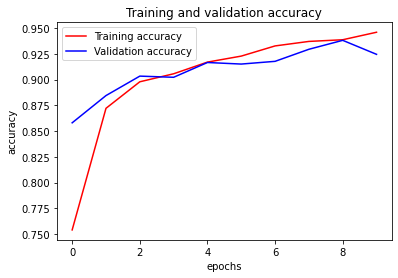

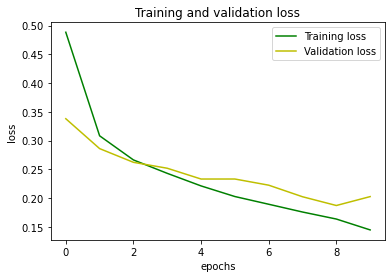

2023/03/16 10:42:43 AM, INFO, mealpy.swarm_based.GWO.GWO_WOA: Solving single objective optimization problem.


235.30349852591792 123.00268785413888 32.790353157224445 19.42930384257116 0.490819727565851 0.17377138456259225
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.4789 - accuracy: 0.7718 - val_loss: 0.3397 - val_accuracy: 0.8675
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3283 - accuracy: 0.8663 - val_loss: 0.2980 - val_accuracy: 0.8909
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2925 - accuracy: 0.8815 - val_loss: 0.2751 - val_accuracy: 0.8958
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2567 - accuracy: 0.8990 - val_loss: 0.2563 - val_accuracy: 0.9060
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2387 - accuracy: 0.9069 - val_loss: 0.2422 - val_accuracy: 0.9079
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2270 - accuracy: 0.9110 - val_loss: 0.2244 - val_accuracy: 0.9162
Epoch 7/10
49/49 [=============================

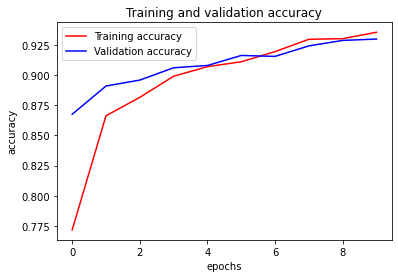

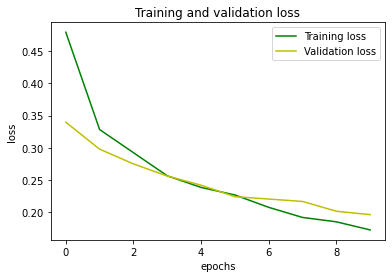

198.4936238668899 75.17045399197875 35.57192134607229 30.680821266391135 0.2598554963882585 0.10448691335454821
Epoch 1/10
49/49 [==============================] - 2s 6ms/step - loss: 0.4952 - accuracy: 0.7574 - val_loss: 0.3440 - val_accuracy: 0.8633
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3240 - accuracy: 0.8613 - val_loss: 0.2961 - val_accuracy: 0.8834
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2804 - accuracy: 0.8869 - val_loss: 0.2791 - val_accuracy: 0.8909
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2584 - accuracy: 0.8954 - val_loss: 0.2500 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2391 - accuracy: 0.9060 - val_loss: 0.2380 - val_accuracy: 0.9124
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2132 - accuracy: 0.9204 - val_loss: 0.2339 - val_accuracy: 0.9169
Epoch 7/10
49/49 [==============================

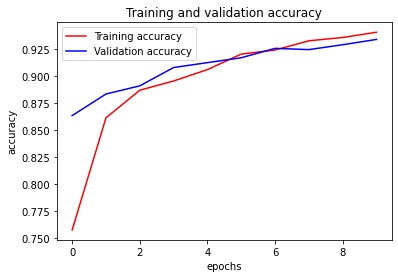

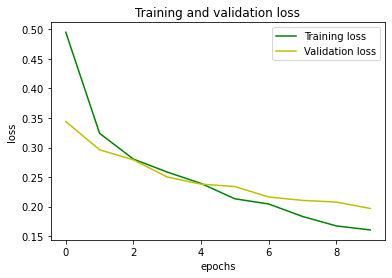

246.27615070289065 96.52924503318178 61.34108947477887 10.090256108114328 0.12334654603609302 0.41604216374655456
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4690 - accuracy: 0.7646 - val_loss: 0.3247 - val_accuracy: 0.8675
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3048 - accuracy: 0.8757 - val_loss: 0.2802 - val_accuracy: 0.8958
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2627 - accuracy: 0.8945 - val_loss: 0.2648 - val_accuracy: 0.9049
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2358 - accuracy: 0.9084 - val_loss: 0.2416 - val_accuracy: 0.9154
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2161 - accuracy: 0.9157 - val_loss: 0.2374 - val_accuracy: 0.9147
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2058 - accuracy: 0.9213 - val_loss: 0.2176 - val_accuracy: 0.9226
Epoch 7/10
49/49 [============================

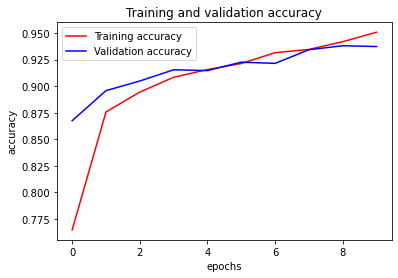

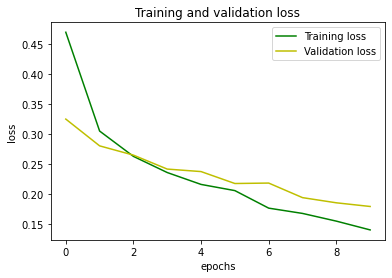

160.53291803123392 73.21890944938016 62.49885676774586 29.843230976273162 0.22637981074879032 0.2279181449851805
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4843 - accuracy: 0.7454 - val_loss: 0.3320 - val_accuracy: 0.8732
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3112 - accuracy: 0.8754 - val_loss: 0.2874 - val_accuracy: 0.8932
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8943 - val_loss: 0.2594 - val_accuracy: 0.9041
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2447 - accuracy: 0.9073 - val_loss: 0.2376 - val_accuracy: 0.9169
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2237 - accuracy: 0.9140 - val_loss: 0.2319 - val_accuracy: 0.9128
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2035 - accuracy: 0.9259 - val_loss: 0.2139 - val_accuracy: 0.9264
Epoch 7/10
49/49 [=============================

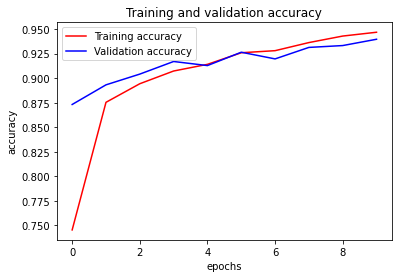

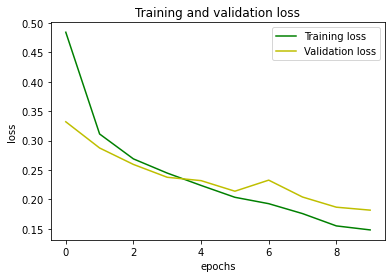

196.53457352963662 122.07232092736528 52.01270591370018 9.57586388079541 0.4711993482318424 0.11314449051096145
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4902 - accuracy: 0.7557 - val_loss: 0.3656 - val_accuracy: 0.8573
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3275 - accuracy: 0.8623 - val_loss: 0.3088 - val_accuracy: 0.8822
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2915 - accuracy: 0.8826 - val_loss: 0.2759 - val_accuracy: 0.9015
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2599 - accuracy: 0.8996 - val_loss: 0.2502 - val_accuracy: 0.9102
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2430 - accuracy: 0.9040 - val_loss: 0.2347 - val_accuracy: 0.9151
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2285 - accuracy: 0.9131 - val_loss: 0.2390 - val_accuracy: 0.9105
Epoch 7/10
49/49 [==============================

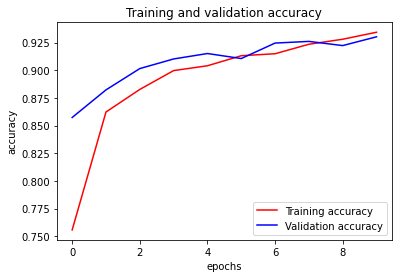

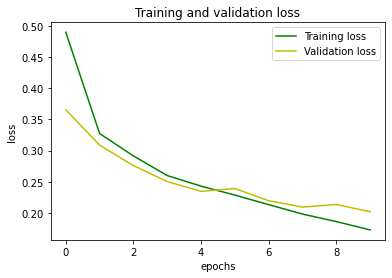

242.01704561504883 120.83301819155304 47.599388202529106 23.452783920705194 0.22876456508538864 0.3898450062700676
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.4467 - accuracy: 0.7839 - val_loss: 0.3246 - val_accuracy: 0.8754
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3023 - accuracy: 0.8784 - val_loss: 0.2824 - val_accuracy: 0.8996
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2744 - accuracy: 0.8885 - val_loss: 0.2564 - val_accuracy: 0.9026
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2372 - accuracy: 0.9102 - val_loss: 0.2547 - val_accuracy: 0.9037
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2140 - accuracy: 0.9183 - val_loss: 0.2320 - val_accuracy: 0.9117
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2009 - accuracy: 0.9213 - val_loss: 0.2193 - val_accuracy: 0.9181
Epoch 7/10
49/49 [===========================

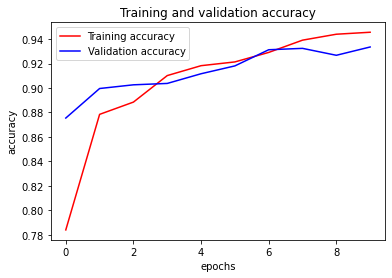

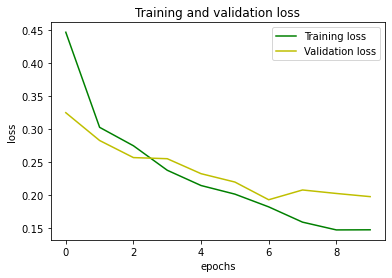

168.3458971062973 127.13282324992431 55.83476546817653 26.896832202405655 0.44595511091635953 0.4725854827213761
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4973 - accuracy: 0.7428 - val_loss: 0.3489 - val_accuracy: 0.8713
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8666 - val_loss: 0.3064 - val_accuracy: 0.8837
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2894 - accuracy: 0.8883 - val_loss: 0.2774 - val_accuracy: 0.8992
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2614 - accuracy: 0.8964 - val_loss: 0.2577 - val_accuracy: 0.9113
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2420 - accuracy: 0.9051 - val_loss: 0.2590 - val_accuracy: 0.9045
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9137 - val_loss: 0.2358 - val_accuracy: 0.9105
Epoch 7/10
49/49 [=============================

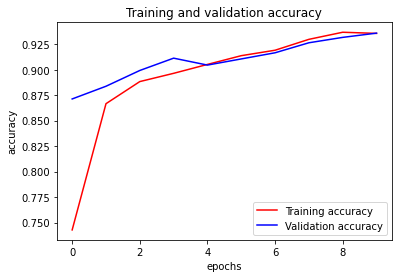

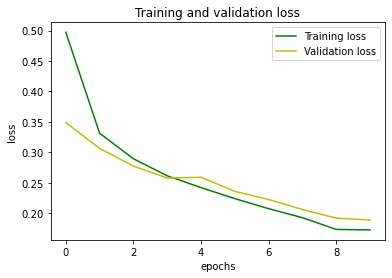

184.88834186000827 83.61510487459225 55.705256999240945 8.623979273400295 0.4120854245815452 0.2409560000292792
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.4967 - accuracy: 0.7557 - val_loss: 0.3653 - val_accuracy: 0.8683
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3530 - accuracy: 0.8589 - val_loss: 0.3167 - val_accuracy: 0.8747
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3031 - accuracy: 0.8780 - val_loss: 0.2807 - val_accuracy: 0.8943
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2782 - accuracy: 0.8927 - val_loss: 0.2696 - val_accuracy: 0.8985
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2555 - accuracy: 0.8982 - val_loss: 0.2435 - val_accuracy: 0.9094
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2316 - accuracy: 0.9136 - val_loss: 0.2312 - val_accuracy: 0.9177
Epoch 7/10
49/49 [==============================

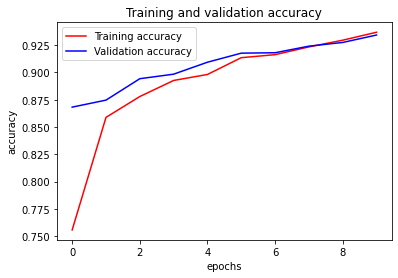

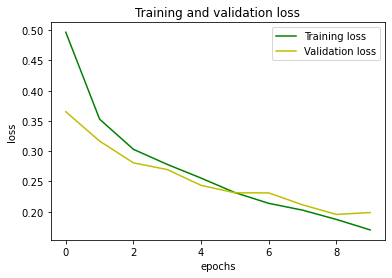

174.79655712334232 115.71972278638744 44.472286471883905 15.289806082942981 0.11814728492851928 0.1925369030147115
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4702 - accuracy: 0.7622 - val_loss: 0.3423 - val_accuracy: 0.8683
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3103 - accuracy: 0.8713 - val_loss: 0.3071 - val_accuracy: 0.8754
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2713 - accuracy: 0.8901 - val_loss: 0.2697 - val_accuracy: 0.8992
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2464 - accuracy: 0.9034 - val_loss: 0.2643 - val_accuracy: 0.9015
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9126 - val_loss: 0.2376 - val_accuracy: 0.9162
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2038 - accuracy: 0.9220 - val_loss: 0.2214 - val_accuracy: 0.9177
Epoch 7/10
49/49 [===========================

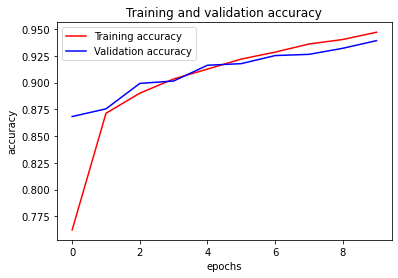

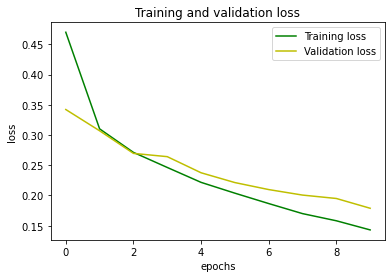

240.46986539017178 82.68027802451843 41.49430059908382 15.300532299175803 0.4780865836645958 0.2405686156574973
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4937 - accuracy: 0.7415 - val_loss: 0.3525 - val_accuracy: 0.8618
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3433 - accuracy: 0.8582 - val_loss: 0.3025 - val_accuracy: 0.8784
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8838 - val_loss: 0.2657 - val_accuracy: 0.9018
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2650 - accuracy: 0.8945 - val_loss: 0.2488 - val_accuracy: 0.9105
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9087 - val_loss: 0.2471 - val_accuracy: 0.9049
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2341 - accuracy: 0.9110 - val_loss: 0.2365 - val_accuracy: 0.9098
Epoch 7/10
49/49 [==============================

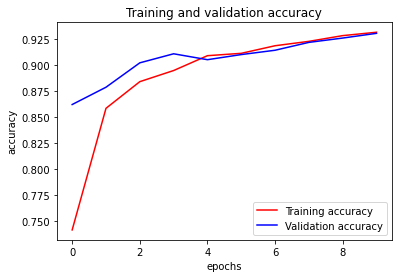

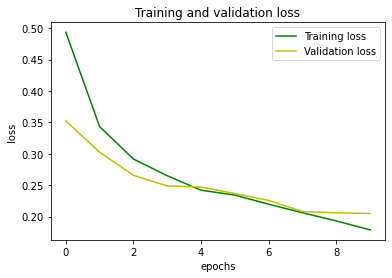

236.3672180484478 119.71663514933336 62.48634540993288 25.937528081986144 0.4869705881317261 0.3133518135930511
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4757 - accuracy: 0.7716 - val_loss: 0.3685 - val_accuracy: 0.8543
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8619 - val_loss: 0.2974 - val_accuracy: 0.8860
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2899 - accuracy: 0.8886 - val_loss: 0.2662 - val_accuracy: 0.9000
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2675 - accuracy: 0.8935 - val_loss: 0.2478 - val_accuracy: 0.9086
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2409 - accuracy: 0.9042 - val_loss: 0.2377 - val_accuracy: 0.9102
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2228 - accuracy: 0.9129 - val_loss: 0.2236 - val_accuracy: 0.9147
Epoch 7/10
49/49 [==============================

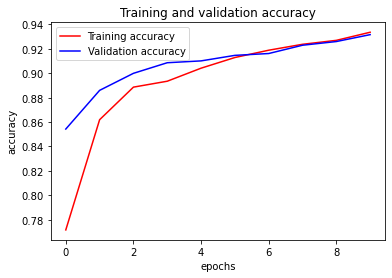

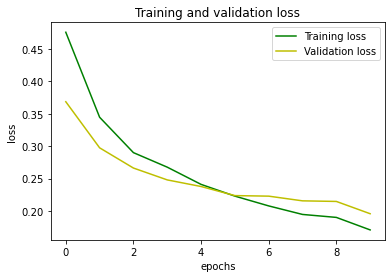

148.68543589681875 94.34012898906245 55.702302467830336 10.957486786582532 0.26521513871143465 0.3900792934083658
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4777 - accuracy: 0.7700 - val_loss: 0.3451 - val_accuracy: 0.8656
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3259 - accuracy: 0.8637 - val_loss: 0.2993 - val_accuracy: 0.8826
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2803 - accuracy: 0.8833 - val_loss: 0.2688 - val_accuracy: 0.8962
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2505 - accuracy: 0.9016 - val_loss: 0.2460 - val_accuracy: 0.9037
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2280 - accuracy: 0.9092 - val_loss: 0.2303 - val_accuracy: 0.9162
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2087 - accuracy: 0.9197 - val_loss: 0.2120 - val_accuracy: 0.9234
Epoch 7/10
49/49 [============================

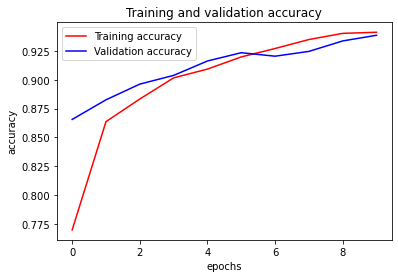

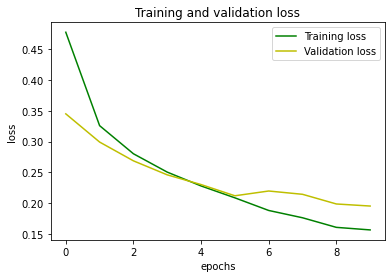

221.68736759878607 67.69802412352836 50.303662357091966 23.247753535379292 0.2845663528908239 0.46741006592229106
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.4721 - accuracy: 0.7651 - val_loss: 0.3410 - val_accuracy: 0.8683
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3194 - accuracy: 0.8705 - val_loss: 0.2967 - val_accuracy: 0.8856
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2738 - accuracy: 0.8898 - val_loss: 0.2745 - val_accuracy: 0.8947
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2585 - accuracy: 0.8983 - val_loss: 0.2598 - val_accuracy: 0.8985
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2322 - accuracy: 0.9068 - val_loss: 0.2244 - val_accuracy: 0.9169
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9183 - val_loss: 0.2434 - val_accuracy: 0.9068
Epoch 7/10
49/49 [============================

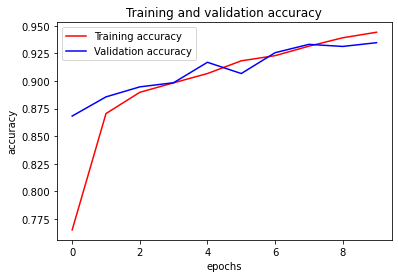

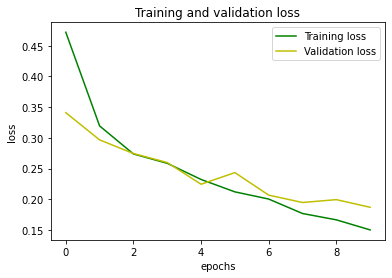

130.250373396096 97.34780323017415 59.27763435320905 27.37383280798155 0.18655337760570287 0.13283511339305096
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4600 - accuracy: 0.7714 - val_loss: 0.3316 - val_accuracy: 0.8724
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3155 - accuracy: 0.8676 - val_loss: 0.3114 - val_accuracy: 0.8811
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2787 - accuracy: 0.8865 - val_loss: 0.2682 - val_accuracy: 0.8981
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2520 - accuracy: 0.8987 - val_loss: 0.2431 - val_accuracy: 0.9098
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2228 - accuracy: 0.9115 - val_loss: 0.2363 - val_accuracy: 0.9120
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2044 - accuracy: 0.9186 - val_loss: 0.2205 - val_accuracy: 0.9188
Epoch 7/10
49/49 [==============================]

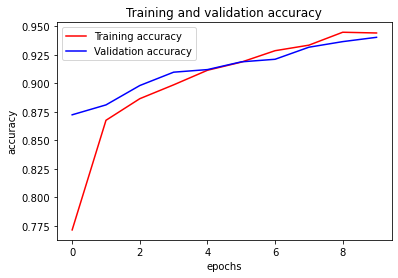

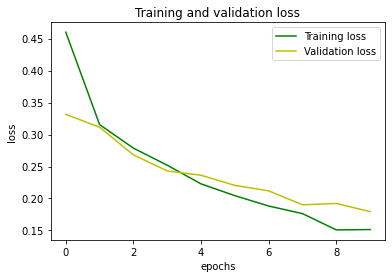

150.42610372624864 108.52299013618665 61.805817720707665 30.689549468061504 0.48459876620664877 0.4505077077274491
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.5245 - accuracy: 0.7269 - val_loss: 0.3628 - val_accuracy: 0.8607
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3445 - accuracy: 0.8571 - val_loss: 0.3174 - val_accuracy: 0.8803
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2999 - accuracy: 0.8776 - val_loss: 0.2720 - val_accuracy: 0.8973
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2636 - accuracy: 0.8949 - val_loss: 0.2650 - val_accuracy: 0.8954
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2497 - accuracy: 0.9017 - val_loss: 0.2457 - val_accuracy: 0.9117
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2296 - accuracy: 0.9118 - val_loss: 0.2402 - val_accuracy: 0.9068
Epoch 7/10
49/49 [===========================

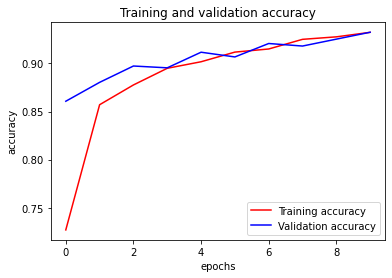

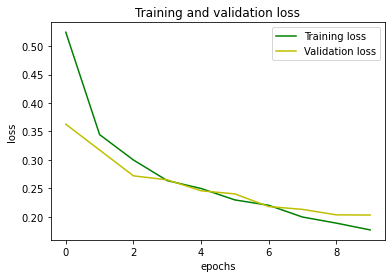

151.80889680729095 88.36350884373931 34.78751954065444 21.95794025115944 0.3069220937929026 0.1168975859248139
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4718 - accuracy: 0.7656 - val_loss: 0.3534 - val_accuracy: 0.8713
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3278 - accuracy: 0.8689 - val_loss: 0.2965 - val_accuracy: 0.8905
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8849 - val_loss: 0.2763 - val_accuracy: 0.8924
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2645 - accuracy: 0.8983 - val_loss: 0.2590 - val_accuracy: 0.9102
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2430 - accuracy: 0.9048 - val_loss: 0.2522 - val_accuracy: 0.9071
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2294 - accuracy: 0.9121 - val_loss: 0.2408 - val_accuracy: 0.9132
Epoch 7/10
49/49 [==============================]

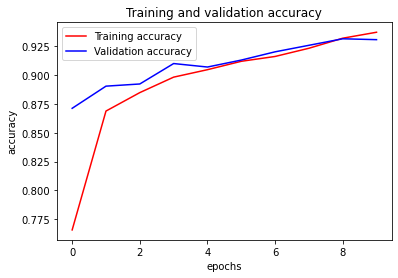

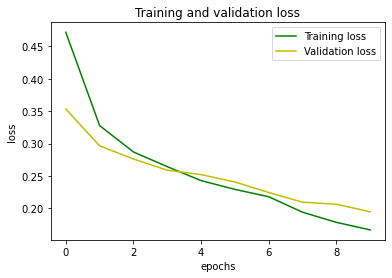

193.93352668898672 86.4589285668298 52.15387128793441 20.624632604739528 0.2365790213463118 0.3052014227552817
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4578 - accuracy: 0.7768 - val_loss: 0.3258 - val_accuracy: 0.8716
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3151 - accuracy: 0.8749 - val_loss: 0.2793 - val_accuracy: 0.8951
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2694 - accuracy: 0.8927 - val_loss: 0.2572 - val_accuracy: 0.9022
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2451 - accuracy: 0.9003 - val_loss: 0.2483 - val_accuracy: 0.9120
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9113 - val_loss: 0.2312 - val_accuracy: 0.9151
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2058 - accuracy: 0.9189 - val_loss: 0.2211 - val_accuracy: 0.9147
Epoch 7/10
49/49 [==============================]

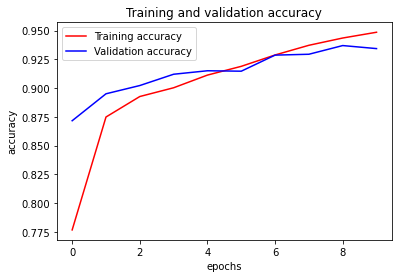

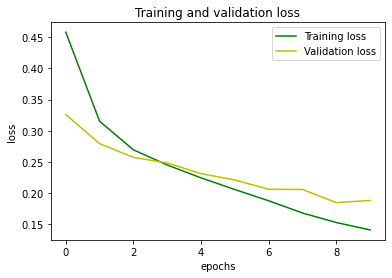

170.8881178617196 113.62496038821504 55.577093726412095 16.260364125967367 0.12046880325169083 0.22805964398656187
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4439 - accuracy: 0.7914 - val_loss: 0.3331 - val_accuracy: 0.8732
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3134 - accuracy: 0.8747 - val_loss: 0.3257 - val_accuracy: 0.8701
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2655 - accuracy: 0.8980 - val_loss: 0.2630 - val_accuracy: 0.8969
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2375 - accuracy: 0.9094 - val_loss: 0.2402 - val_accuracy: 0.9143
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2134 - accuracy: 0.9170 - val_loss: 0.2465 - val_accuracy: 0.9056
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1990 - accuracy: 0.9226 - val_loss: 0.2379 - val_accuracy: 0.9132
Epoch 7/10
49/49 [===========================

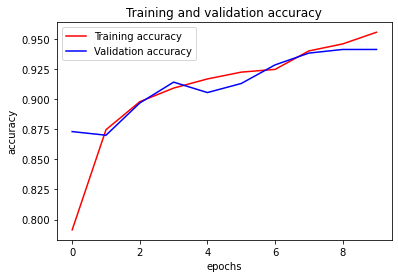

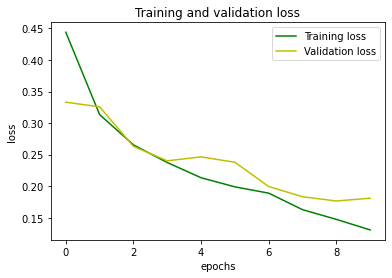

215.95513624743165 64.78852277053319 41.09727121341368 13.979960245518962 0.43892665139242515 0.3879343713978357
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4951 - accuracy: 0.7582 - val_loss: 0.3533 - val_accuracy: 0.8637
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3453 - accuracy: 0.8635 - val_loss: 0.2978 - val_accuracy: 0.8886
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2964 - accuracy: 0.8831 - val_loss: 0.2769 - val_accuracy: 0.8920
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2726 - accuracy: 0.8937 - val_loss: 0.2537 - val_accuracy: 0.9052
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.9037 - val_loss: 0.2402 - val_accuracy: 0.9109
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2333 - accuracy: 0.9103 - val_loss: 0.2271 - val_accuracy: 0.9200
Epoch 7/10
49/49 [=============================

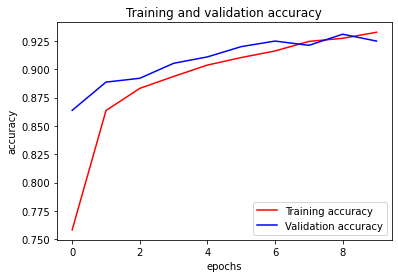

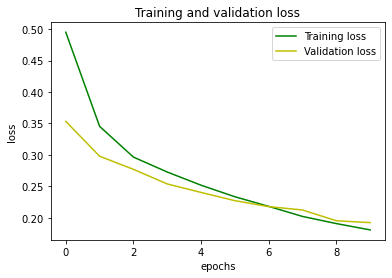

184.84611217633113 126.12790697532961 62.687729933930825 23.93830473094802 0.15999830902848658 0.30822137010282336
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4430 - accuracy: 0.7862 - val_loss: 0.3214 - val_accuracy: 0.8724
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2982 - accuracy: 0.8781 - val_loss: 0.2784 - val_accuracy: 0.8962
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2524 - accuracy: 0.8966 - val_loss: 0.2538 - val_accuracy: 0.9083
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2329 - accuracy: 0.9102 - val_loss: 0.2384 - val_accuracy: 0.9139
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.9145 - val_loss: 0.2295 - val_accuracy: 0.9158
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1892 - accuracy: 0.9289 - val_loss: 0.2049 - val_accuracy: 0.9298
Epoch 7/10
49/49 [===========================

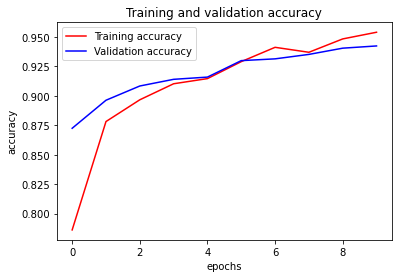

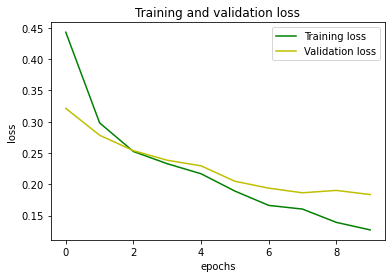

245.49965324559201 82.48886118653331 45.54451244504377 11.936746854506922 0.1179900208879527 0.20596653315087843
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.4598 - accuracy: 0.7765 - val_loss: 0.3280 - val_accuracy: 0.8690
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3042 - accuracy: 0.8739 - val_loss: 0.2770 - val_accuracy: 0.8969
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8958 - val_loss: 0.2488 - val_accuracy: 0.9120
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2318 - accuracy: 0.9079 - val_loss: 0.2374 - val_accuracy: 0.9177
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2098 - accuracy: 0.9197 - val_loss: 0.2198 - val_accuracy: 0.9203
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.1875 - accuracy: 0.9309 - val_loss: 0.2082 - val_accuracy: 0.9260
Epoch 7/10
49/49 [=============================

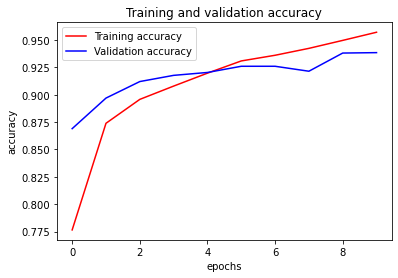

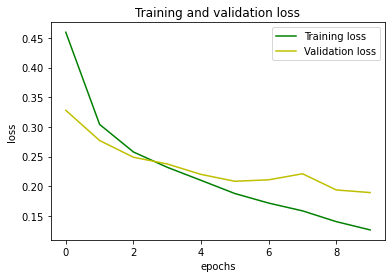

245.90892038358908 100.6599260428174 45.82302829056845 20.135101183257955 0.3812200520815915 0.2588745360643319
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4675 - accuracy: 0.7663 - val_loss: 0.3354 - val_accuracy: 0.8705
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3207 - accuracy: 0.8671 - val_loss: 0.3045 - val_accuracy: 0.8796
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2765 - accuracy: 0.8903 - val_loss: 0.2657 - val_accuracy: 0.8969
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2556 - accuracy: 0.8992 - val_loss: 0.2545 - val_accuracy: 0.9071
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9123 - val_loss: 0.2323 - val_accuracy: 0.9139
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2137 - accuracy: 0.9173 - val_loss: 0.2229 - val_accuracy: 0.9226
Epoch 7/10
49/49 [==============================

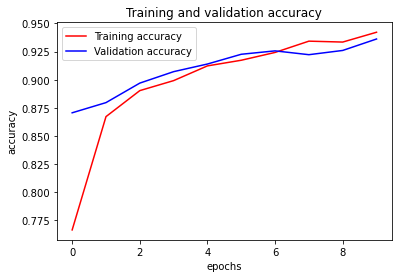

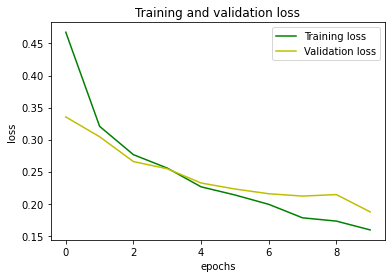

184.30807365439867 123.39087891578949 41.62938978373481 20.684146407146333 0.22446393318015678 0.3259700929569833
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4289 - accuracy: 0.7954 - val_loss: 0.3243 - val_accuracy: 0.8694
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3006 - accuracy: 0.8770 - val_loss: 0.2849 - val_accuracy: 0.8909
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2668 - accuracy: 0.8954 - val_loss: 0.2525 - val_accuracy: 0.9037
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2411 - accuracy: 0.9068 - val_loss: 0.2413 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2191 - accuracy: 0.9128 - val_loss: 0.2273 - val_accuracy: 0.9173
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2021 - accuracy: 0.9220 - val_loss: 0.2310 - val_accuracy: 0.9132
Epoch 7/10
49/49 [============================

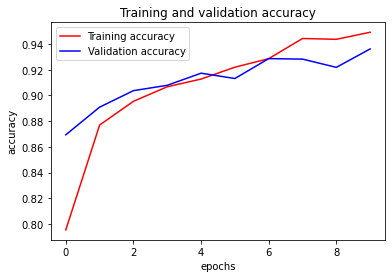

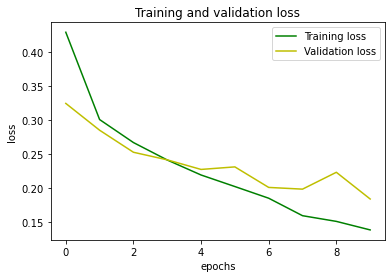

170.64345575438205 79.86162788847071 50.39785894073379 16.453263240580608 0.25224673668681336 0.25051803425097685
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4916 - accuracy: 0.7483 - val_loss: 0.3292 - val_accuracy: 0.8709
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3180 - accuracy: 0.8671 - val_loss: 0.2981 - val_accuracy: 0.8864
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2793 - accuracy: 0.8857 - val_loss: 0.2674 - val_accuracy: 0.9015
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2503 - accuracy: 0.9026 - val_loss: 0.2467 - val_accuracy: 0.9090
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2217 - accuracy: 0.9144 - val_loss: 0.2297 - val_accuracy: 0.9192
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2052 - accuracy: 0.9228 - val_loss: 0.2424 - val_accuracy: 0.9094
Epoch 7/10
49/49 [============================

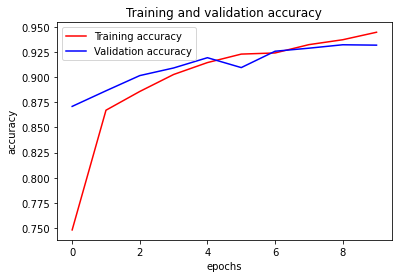

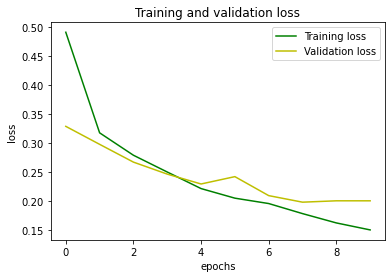

198.35522880083113 117.11850790560806 47.2328413688665 28.449698497420872 0.42630732524121817 0.14114503741112402
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4973 - accuracy: 0.7464 - val_loss: 0.3327 - val_accuracy: 0.8709
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3318 - accuracy: 0.8635 - val_loss: 0.2977 - val_accuracy: 0.8864
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2860 - accuracy: 0.8894 - val_loss: 0.2697 - val_accuracy: 0.8996
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2564 - accuracy: 0.9011 - val_loss: 0.2547 - val_accuracy: 0.9026
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9081 - val_loss: 0.2361 - val_accuracy: 0.9136
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2169 - accuracy: 0.9160 - val_loss: 0.2232 - val_accuracy: 0.9196
Epoch 7/10
49/49 [============================

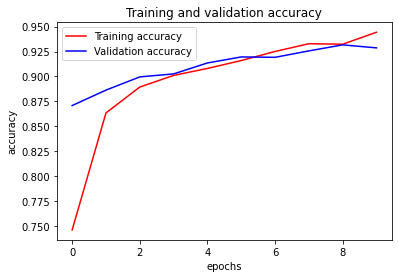

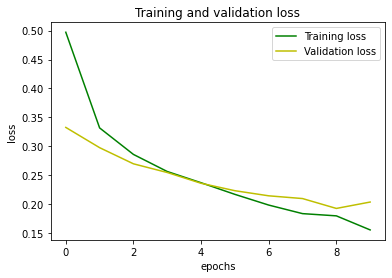

167.16619554630944 75.52113080687332 33.10749919255251 9.310356291481456 0.11700995693300786 0.2972982425797245
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4974 - accuracy: 0.7326 - val_loss: 0.3707 - val_accuracy: 0.8652
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3281 - accuracy: 0.8648 - val_loss: 0.2960 - val_accuracy: 0.8913
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8877 - val_loss: 0.2688 - val_accuracy: 0.8962
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2493 - accuracy: 0.9030 - val_loss: 0.2510 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.9092 - val_loss: 0.2307 - val_accuracy: 0.9154
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2063 - accuracy: 0.9220 - val_loss: 0.2156 - val_accuracy: 0.9203
Epoch 7/10
49/49 [==============================

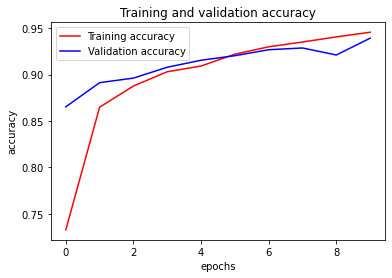

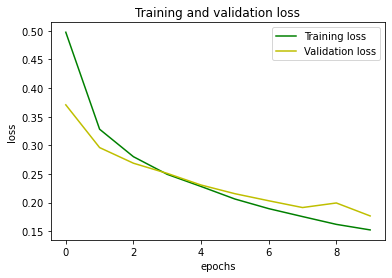

189.8606026444918 65.8591564336812 32.62543833959045 14.486925130183801 0.4396555779588801 0.3431831077904458
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5292 - accuracy: 0.7232 - val_loss: 0.3844 - val_accuracy: 0.8569
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3645 - accuracy: 0.8488 - val_loss: 0.3173 - val_accuracy: 0.8754
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3066 - accuracy: 0.8784 - val_loss: 0.2803 - val_accuracy: 0.8973
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2778 - accuracy: 0.8927 - val_loss: 0.2664 - val_accuracy: 0.9052
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9030 - val_loss: 0.2531 - val_accuracy: 0.9083
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9082 - val_loss: 0.2477 - val_accuracy: 0.9192
Epoch 7/10
49/49 [==============================] 

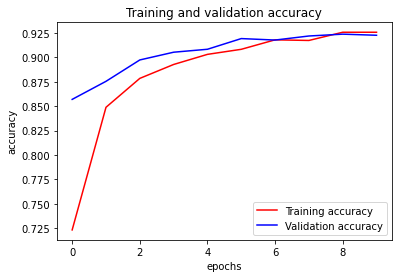

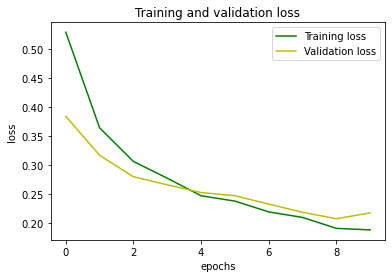

234.30466485943037 90.33718176075763 47.3156530348117 29.948083561206005 0.21299915862277477 0.39531741974655776
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4513 - accuracy: 0.7794 - val_loss: 0.3298 - val_accuracy: 0.8728
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3044 - accuracy: 0.8731 - val_loss: 0.2851 - val_accuracy: 0.8928
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2642 - accuracy: 0.8943 - val_loss: 0.2715 - val_accuracy: 0.9003
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2363 - accuracy: 0.9089 - val_loss: 0.2410 - val_accuracy: 0.9090
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2181 - accuracy: 0.9134 - val_loss: 0.2345 - val_accuracy: 0.9117
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2016 - accuracy: 0.9251 - val_loss: 0.2075 - val_accuracy: 0.9260
Epoch 7/10
49/49 [=============================

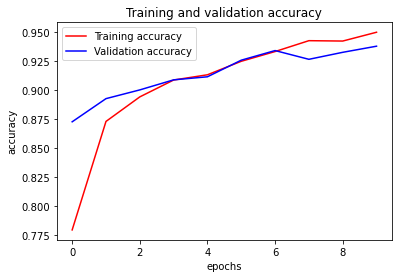

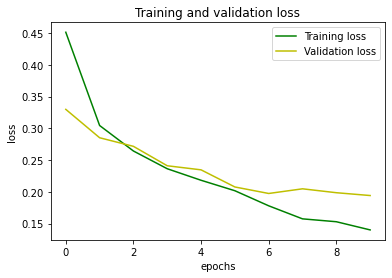

132.31248988737917 119.16609787374847 52.27851150188405 25.540332777224222 0.4057776763418879 0.2162228852058514
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4816 - accuracy: 0.7491 - val_loss: 0.3518 - val_accuracy: 0.8615
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3370 - accuracy: 0.8580 - val_loss: 0.2958 - val_accuracy: 0.8852
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8848 - val_loss: 0.2732 - val_accuracy: 0.8947
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2611 - accuracy: 0.8946 - val_loss: 0.2715 - val_accuracy: 0.8939
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2493 - accuracy: 0.9000 - val_loss: 0.2585 - val_accuracy: 0.8973
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9145 - val_loss: 0.2350 - val_accuracy: 0.9151
Epoch 7/10
49/49 [=============================

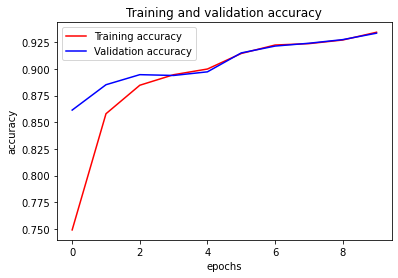

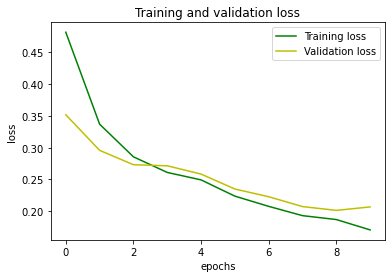

195.81898532560973 121.77941455292705 49.26183603236258 22.109086572150012 0.4698240067555389 0.29813696669586076
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4870 - accuracy: 0.7645 - val_loss: 0.3256 - val_accuracy: 0.8769
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3246 - accuracy: 0.8673 - val_loss: 0.2834 - val_accuracy: 0.8996
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2798 - accuracy: 0.8890 - val_loss: 0.2691 - val_accuracy: 0.9034
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2598 - accuracy: 0.8954 - val_loss: 0.2559 - val_accuracy: 0.9083
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2340 - accuracy: 0.9111 - val_loss: 0.2461 - val_accuracy: 0.9083
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2230 - accuracy: 0.9137 - val_loss: 0.2281 - val_accuracy: 0.9188
Epoch 7/10
49/49 [============================

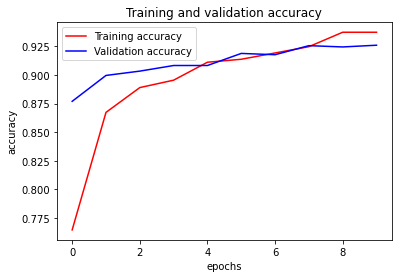

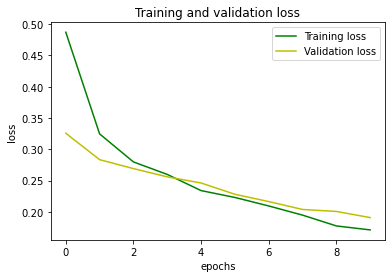

225.0232757323764 86.88938967585322 45.392289375752036 20.31172116025459 0.45461315946248043 0.27015047109459034
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.5314 - accuracy: 0.7205 - val_loss: 0.3850 - val_accuracy: 0.8448
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3573 - accuracy: 0.8491 - val_loss: 0.3119 - val_accuracy: 0.8815
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2983 - accuracy: 0.8791 - val_loss: 0.2819 - val_accuracy: 0.8920
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2732 - accuracy: 0.8922 - val_loss: 0.2594 - val_accuracy: 0.9018
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2454 - accuracy: 0.9048 - val_loss: 0.2538 - val_accuracy: 0.9026
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2327 - accuracy: 0.9087 - val_loss: 0.2462 - val_accuracy: 0.9045
Epoch 7/10
49/49 [=============================

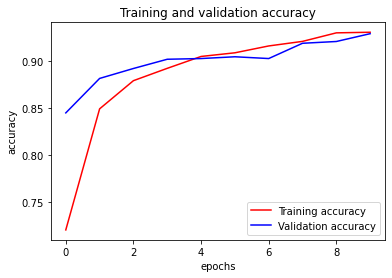

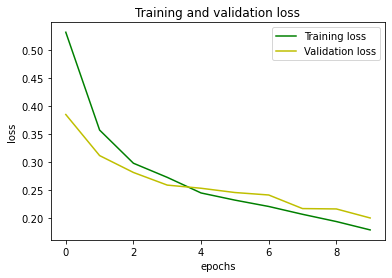

190.62530725801915 65.7742893186826 36.16844512818326 13.647503380766295 0.4379722247069288 0.24924902835459542
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5448 - accuracy: 0.7095 - val_loss: 0.3870 - val_accuracy: 0.8581
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3543 - accuracy: 0.8478 - val_loss: 0.3185 - val_accuracy: 0.8750
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3099 - accuracy: 0.8757 - val_loss: 0.2783 - val_accuracy: 0.8924
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2715 - accuracy: 0.8890 - val_loss: 0.2670 - val_accuracy: 0.8973
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2550 - accuracy: 0.9016 - val_loss: 0.2501 - val_accuracy: 0.9098
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2370 - accuracy: 0.9077 - val_loss: 0.2380 - val_accuracy: 0.9109
Epoch 7/10
49/49 [==============================

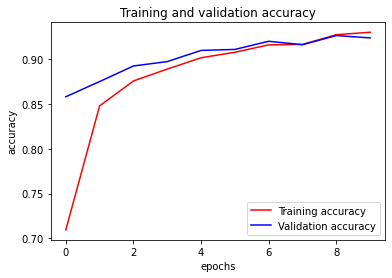

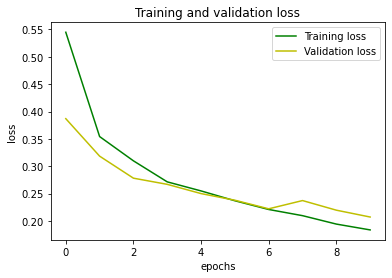

193.5878578071398 71.94911769630549 42.04861260522077 17.14209926289247 0.33354567317380196 0.2658836627713128
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5102 - accuracy: 0.7303 - val_loss: 0.3595 - val_accuracy: 0.8584
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8556 - val_loss: 0.3110 - val_accuracy: 0.8784
Epoch 3/10
49/49 [==============================] - 0s 5ms/step - loss: 0.2908 - accuracy: 0.8814 - val_loss: 0.2733 - val_accuracy: 0.8977
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2592 - accuracy: 0.8958 - val_loss: 0.2655 - val_accuracy: 0.8935
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2418 - accuracy: 0.9073 - val_loss: 0.2377 - val_accuracy: 0.9173
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2177 - accuracy: 0.9205 - val_loss: 0.2390 - val_accuracy: 0.9079
Epoch 7/10
49/49 [==============================]

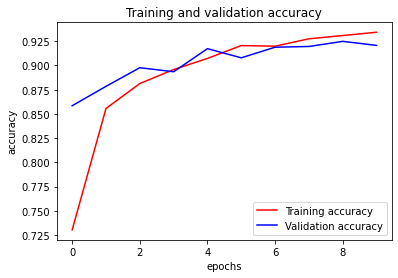

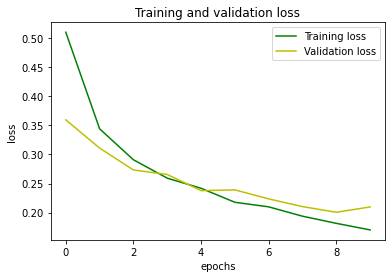

221.2050348434486 87.21841999805365 59.072656785349466 26.41147659714888 0.3965254000480682 0.29749827800668094
Epoch 1/10
49/49 [==============================] - 1s 7ms/step - loss: 0.5047 - accuracy: 0.7355 - val_loss: 0.3713 - val_accuracy: 0.8573
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3290 - accuracy: 0.8637 - val_loss: 0.3006 - val_accuracy: 0.8898
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2909 - accuracy: 0.8812 - val_loss: 0.2816 - val_accuracy: 0.8920
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2698 - accuracy: 0.8962 - val_loss: 0.2540 - val_accuracy: 0.9083
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2418 - accuracy: 0.9081 - val_loss: 0.2463 - val_accuracy: 0.9090
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2237 - accuracy: 0.9144 - val_loss: 0.2317 - val_accuracy: 0.9166
Epoch 7/10
49/49 [==============================

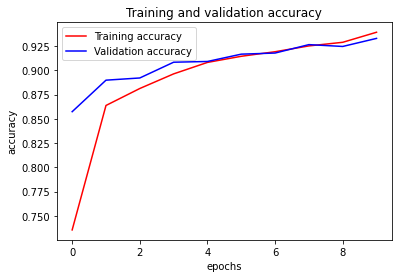

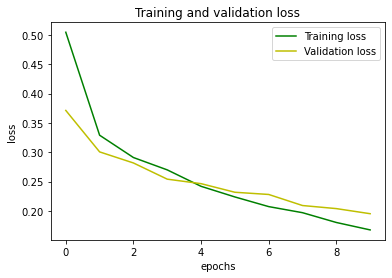

180.44680422884673 80.62598931757745 48.98914055259575 20.341758198495953 0.34837257849782777 0.3269761033943697
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.4958 - accuracy: 0.7540 - val_loss: 0.3459 - val_accuracy: 0.8630
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3349 - accuracy: 0.8621 - val_loss: 0.3006 - val_accuracy: 0.8871
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2859 - accuracy: 0.8849 - val_loss: 0.2749 - val_accuracy: 0.8943
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2577 - accuracy: 0.8974 - val_loss: 0.2473 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2361 - accuracy: 0.9103 - val_loss: 0.2378 - val_accuracy: 0.9124
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2229 - accuracy: 0.9155 - val_loss: 0.2315 - val_accuracy: 0.9109
Epoch 7/10
49/49 [=============================

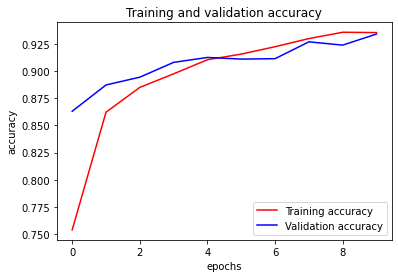

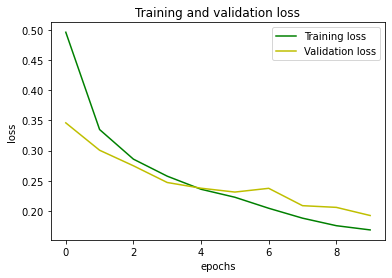

218.42707340976418 96.70712525536847 41.71090111520123 19.27508836564656 0.4139175081398995 0.32050055928047744
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5913 - accuracy: 0.6750 - val_loss: 0.4376 - val_accuracy: 0.7837
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3773 - accuracy: 0.8313 - val_loss: 0.3315 - val_accuracy: 0.8671
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3026 - accuracy: 0.8788 - val_loss: 0.2813 - val_accuracy: 0.8954
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2706 - accuracy: 0.8907 - val_loss: 0.2580 - val_accuracy: 0.9026
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2496 - accuracy: 0.9040 - val_loss: 0.2471 - val_accuracy: 0.9068
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2255 - accuracy: 0.9149 - val_loss: 0.2438 - val_accuracy: 0.9109
Epoch 7/10
49/49 [==============================

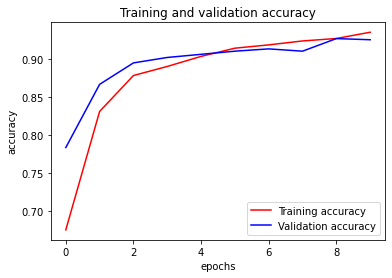

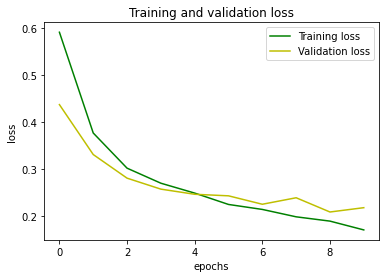

211.4291552040742 85.99582275675765 52.68072210516053 23.1181711531061 0.4038303924376648 0.2920501659308046
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4913 - accuracy: 0.7488 - val_loss: 0.3500 - val_accuracy: 0.8664
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3377 - accuracy: 0.8606 - val_loss: 0.2945 - val_accuracy: 0.8841
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2875 - accuracy: 0.8848 - val_loss: 0.2734 - val_accuracy: 0.9007
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2641 - accuracy: 0.8938 - val_loss: 0.2587 - val_accuracy: 0.9037
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9066 - val_loss: 0.2400 - val_accuracy: 0.9154
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2224 - accuracy: 0.9131 - val_loss: 0.2412 - val_accuracy: 0.9139
Epoch 7/10
49/49 [==============================] -

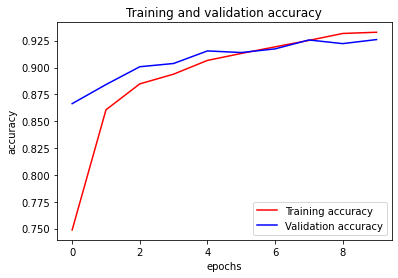

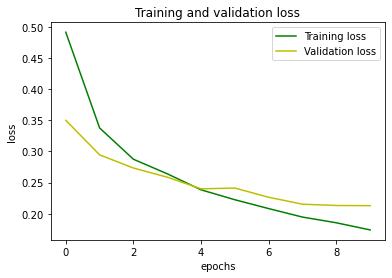

174.67408157386498 64.0 39.23576504380035 19.635917139812516 0.32628608386021146 0.24368131022444084
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.4968 - accuracy: 0.7470 - val_loss: 0.3458 - val_accuracy: 0.8686
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3322 - accuracy: 0.8653 - val_loss: 0.2961 - val_accuracy: 0.8932
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2842 - accuracy: 0.8919 - val_loss: 0.2847 - val_accuracy: 0.8920
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2623 - accuracy: 0.8979 - val_loss: 0.2520 - val_accuracy: 0.9105
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2437 - accuracy: 0.9017 - val_loss: 0.2398 - val_accuracy: 0.9158
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2244 - accuracy: 0.9152 - val_loss: 0.2284 - val_accuracy: 0.9192
Epoch 7/10
49/49 [==============================] - 0s 3ms/

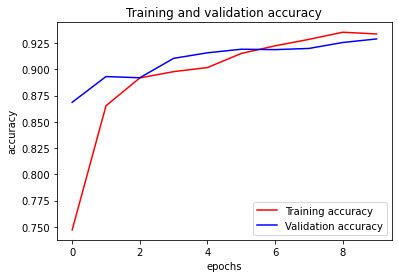

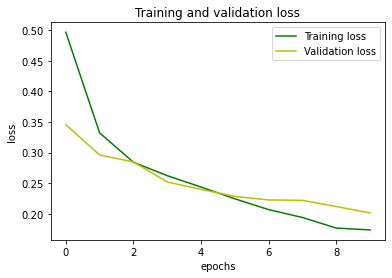

187.17179160759164 64.0 46.72637444423747 23.260319375022053 0.37458573694208513 0.27448736418812486
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5389 - accuracy: 0.7070 - val_loss: 0.3819 - val_accuracy: 0.8543
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3576 - accuracy: 0.8519 - val_loss: 0.3038 - val_accuracy: 0.8860
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2968 - accuracy: 0.8823 - val_loss: 0.2752 - val_accuracy: 0.8935
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2725 - accuracy: 0.8906 - val_loss: 0.2772 - val_accuracy: 0.8890
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2494 - accuracy: 0.9016 - val_loss: 0.2507 - val_accuracy: 0.9102
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2344 - accuracy: 0.9126 - val_loss: 0.2307 - val_accuracy: 0.9128
Epoch 7/10
49/49 [==============================] - 0s 3ms/

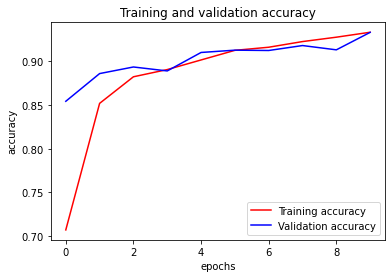

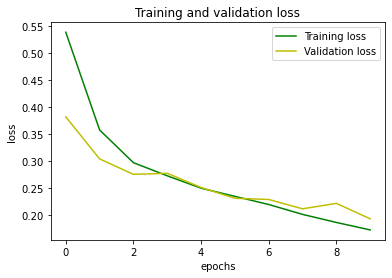

234.97488393187203 87.51101547367688 58.87346260091042 25.521646270129015 0.45584800739146925 0.2553125362373614
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4969 - accuracy: 0.7441 - val_loss: 0.3463 - val_accuracy: 0.8558
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3341 - accuracy: 0.8647 - val_loss: 0.2940 - val_accuracy: 0.8841
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2930 - accuracy: 0.8822 - val_loss: 0.2667 - val_accuracy: 0.9034
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2661 - accuracy: 0.8979 - val_loss: 0.2588 - val_accuracy: 0.9018
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2546 - accuracy: 0.9000 - val_loss: 0.2380 - val_accuracy: 0.9071
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2249 - accuracy: 0.9140 - val_loss: 0.2345 - val_accuracy: 0.9117
Epoch 7/10
49/49 [=============================

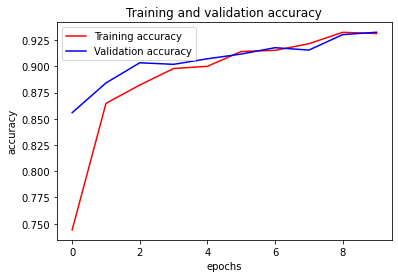

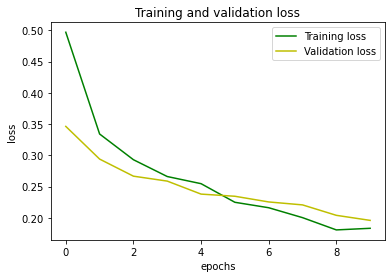

202.25769234900108 66.06330597135255 35.88361791508007 15.253654592384615 0.4274977888068488 0.285960399489974
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5255 - accuracy: 0.7397 - val_loss: 0.3704 - val_accuracy: 0.8550
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3566 - accuracy: 0.8532 - val_loss: 0.3160 - val_accuracy: 0.8815
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3024 - accuracy: 0.8809 - val_loss: 0.2902 - val_accuracy: 0.8879
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2809 - accuracy: 0.8893 - val_loss: 0.2601 - val_accuracy: 0.9030
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2626 - accuracy: 0.9024 - val_loss: 0.2502 - val_accuracy: 0.9049
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9060 - val_loss: 0.2398 - val_accuracy: 0.9113
Epoch 7/10
49/49 [==============================]

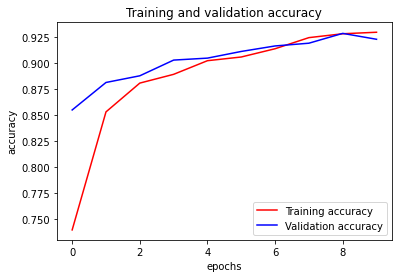

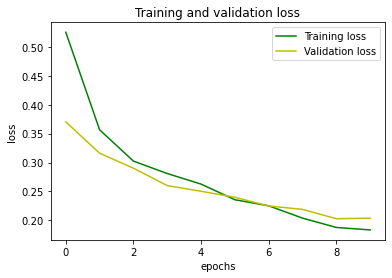

158.62710888922834 70.75763747532882 41.22854716761358 19.480624064463548 0.28521178528221 0.28316916130235686
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.4668 - accuracy: 0.7711 - val_loss: 0.3436 - val_accuracy: 0.8675
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3261 - accuracy: 0.8626 - val_loss: 0.3191 - val_accuracy: 0.8743
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2785 - accuracy: 0.8899 - val_loss: 0.2750 - val_accuracy: 0.8909
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2535 - accuracy: 0.9024 - val_loss: 0.2593 - val_accuracy: 0.9045
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2379 - accuracy: 0.9089 - val_loss: 0.2432 - val_accuracy: 0.9132
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2160 - accuracy: 0.9178 - val_loss: 0.2274 - val_accuracy: 0.9188
Epoch 7/10
49/49 [==============================]

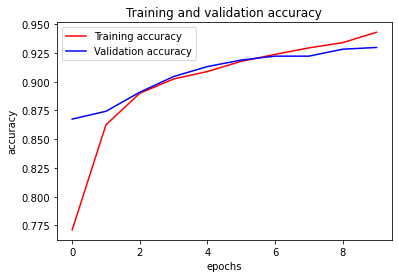

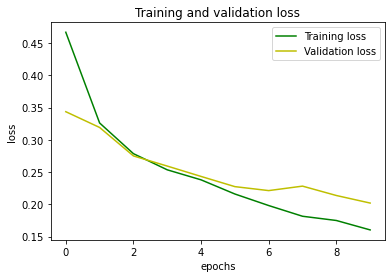

206.02954077756712 76.02009991101254 47.03400819035704 20.66120148310492 0.393887967048063 0.30237028464899535
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5452 - accuracy: 0.7124 - val_loss: 0.3920 - val_accuracy: 0.8475
Epoch 2/10
49/49 [==============================] - 0s 5ms/step - loss: 0.3616 - accuracy: 0.8508 - val_loss: 0.3052 - val_accuracy: 0.8849
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2964 - accuracy: 0.8788 - val_loss: 0.2810 - val_accuracy: 0.8977
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.8937 - val_loss: 0.2613 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2476 - accuracy: 0.9040 - val_loss: 0.2381 - val_accuracy: 0.9124
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2284 - accuracy: 0.9139 - val_loss: 0.2308 - val_accuracy: 0.9181
Epoch 7/10
49/49 [==============================]

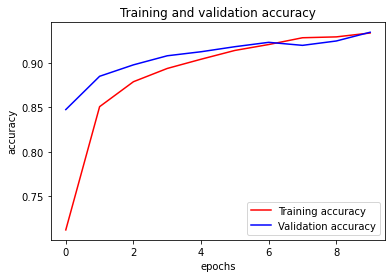

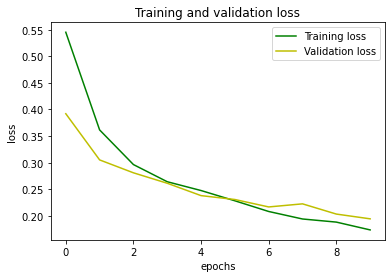

156.3633850755326 71.42401337351559 52.63881829602534 23.086864086130618 0.232985202904172 0.16855180060811456
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.5269 - accuracy: 0.7232 - val_loss: 0.3686 - val_accuracy: 0.8611
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3346 - accuracy: 0.8629 - val_loss: 0.3056 - val_accuracy: 0.8905
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2940 - accuracy: 0.8781 - val_loss: 0.2843 - val_accuracy: 0.9000
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2657 - accuracy: 0.8961 - val_loss: 0.2735 - val_accuracy: 0.9022
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2466 - accuracy: 0.9048 - val_loss: 0.2506 - val_accuracy: 0.9064
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2349 - accuracy: 0.9103 - val_loss: 0.2370 - val_accuracy: 0.9139
Epoch 7/10
49/49 [==============================]

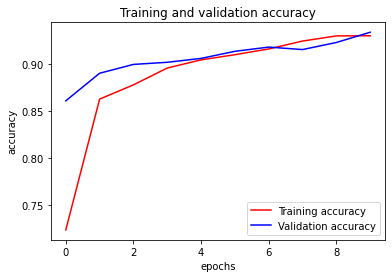

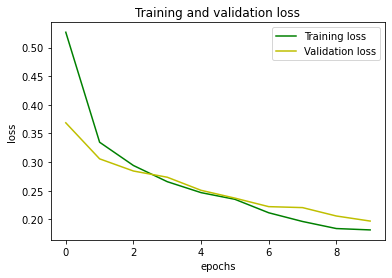

231.0947906003704 104.45944708177394 60.52104814656386 27.50532848034781 0.5 0.4071972708411408
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4773 - accuracy: 0.7700 - val_loss: 0.3333 - val_accuracy: 0.8626
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3329 - accuracy: 0.8637 - val_loss: 0.3094 - val_accuracy: 0.8766
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2916 - accuracy: 0.8830 - val_loss: 0.2647 - val_accuracy: 0.8996
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2642 - accuracy: 0.8951 - val_loss: 0.2467 - val_accuracy: 0.9041
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2441 - accuracy: 0.9061 - val_loss: 0.2310 - val_accuracy: 0.9102
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2180 - accuracy: 0.9160 - val_loss: 0.2157 - val_accuracy: 0.9207
Epoch 7/10
49/49 [==============================] - 0s 3ms/step 

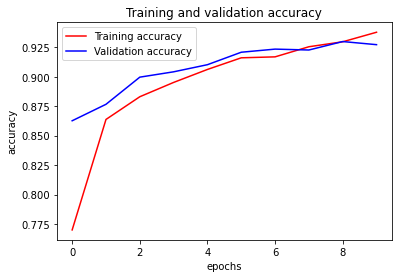

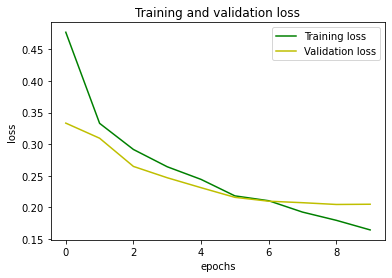

213.60194782159886 76.00248167862156 37.00213451868466 17.739575101941025 0.4201515535464315 0.2926362112001359
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4791 - accuracy: 0.7714 - val_loss: 0.3504 - val_accuracy: 0.8645
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3422 - accuracy: 0.8603 - val_loss: 0.3126 - val_accuracy: 0.8796
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3001 - accuracy: 0.8838 - val_loss: 0.2946 - val_accuracy: 0.8875
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2731 - accuracy: 0.8922 - val_loss: 0.2639 - val_accuracy: 0.9083
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2470 - accuracy: 0.9043 - val_loss: 0.2440 - val_accuracy: 0.9128
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2263 - accuracy: 0.9126 - val_loss: 0.2336 - val_accuracy: 0.9162
Epoch 7/10
49/49 [==============================

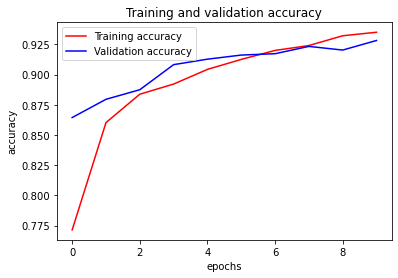

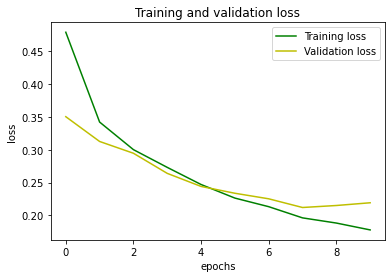

195.35499480977217 69.18608013246146 42.45372637908673 19.089257605440586 0.3528684621670704 0.25737926044676307
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5065 - accuracy: 0.7407 - val_loss: 0.3574 - val_accuracy: 0.8520
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3434 - accuracy: 0.8590 - val_loss: 0.3035 - val_accuracy: 0.8811
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2879 - accuracy: 0.8860 - val_loss: 0.2738 - val_accuracy: 0.8958
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2648 - accuracy: 0.8935 - val_loss: 0.2617 - val_accuracy: 0.9018
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2458 - accuracy: 0.9037 - val_loss: 0.2583 - val_accuracy: 0.8992
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2271 - accuracy: 0.9124 - val_loss: 0.2274 - val_accuracy: 0.9185
Epoch 7/10
49/49 [=============================

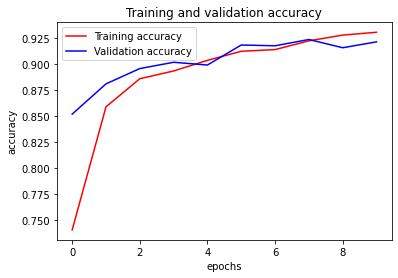

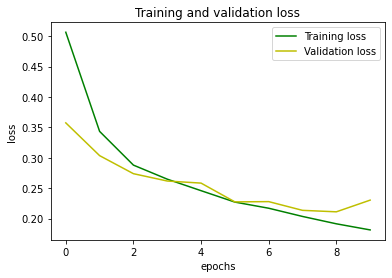

219.38575619615506 86.36213325747308 50.9637134782325 21.568702799366378 0.4219864339914607 0.31822693795100504
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4897 - accuracy: 0.7517 - val_loss: 0.3542 - val_accuracy: 0.8660
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3314 - accuracy: 0.8637 - val_loss: 0.3028 - val_accuracy: 0.8841
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2871 - accuracy: 0.8820 - val_loss: 0.2644 - val_accuracy: 0.9034
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2539 - accuracy: 0.9022 - val_loss: 0.2628 - val_accuracy: 0.9015
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2397 - accuracy: 0.9094 - val_loss: 0.2395 - val_accuracy: 0.9124
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2261 - accuracy: 0.9150 - val_loss: 0.2358 - val_accuracy: 0.9128
Epoch 7/10
49/49 [==============================

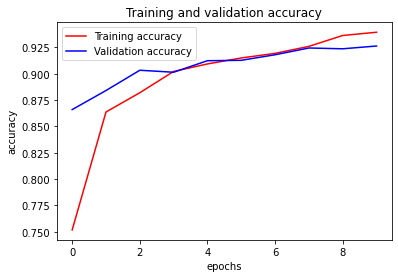

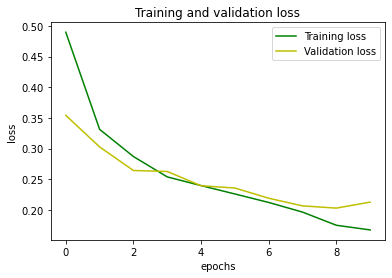

145.08935624878413 64.0 36.80457792656932 16.480675583411397 0.2819236061350523 0.24604044403843153
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.5020 - accuracy: 0.7502 - val_loss: 0.3535 - val_accuracy: 0.8630
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3376 - accuracy: 0.8610 - val_loss: 0.3084 - val_accuracy: 0.8788
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2917 - accuracy: 0.8825 - val_loss: 0.2862 - val_accuracy: 0.8932
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2683 - accuracy: 0.8977 - val_loss: 0.2667 - val_accuracy: 0.8954
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2483 - accuracy: 0.9064 - val_loss: 0.2505 - val_accuracy: 0.9094
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2299 - accuracy: 0.9110 - val_loss: 0.2387 - val_accuracy: 0.9132
Epoch 7/10
49/49 [==============================] - 0s 3ms/s

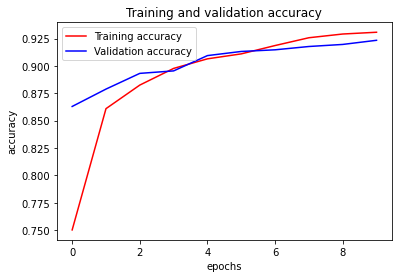

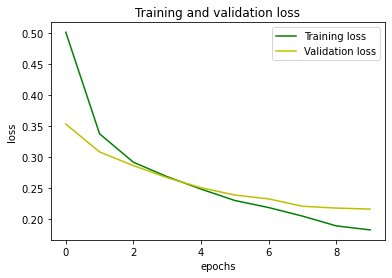

212.4388481767853 70.50385320809978 51.664090146326295 24.109018901389305 0.41090667225529165 0.2864125181962858
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4762 - accuracy: 0.7763 - val_loss: 0.3457 - val_accuracy: 0.8622
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3257 - accuracy: 0.8665 - val_loss: 0.2955 - val_accuracy: 0.8860
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2889 - accuracy: 0.8880 - val_loss: 0.2661 - val_accuracy: 0.8992
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2596 - accuracy: 0.8988 - val_loss: 0.2473 - val_accuracy: 0.9094
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9026 - val_loss: 0.2363 - val_accuracy: 0.9147
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2251 - accuracy: 0.9139 - val_loss: 0.2361 - val_accuracy: 0.9109
Epoch 7/10
49/49 [=============================

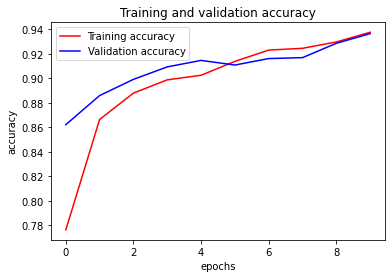

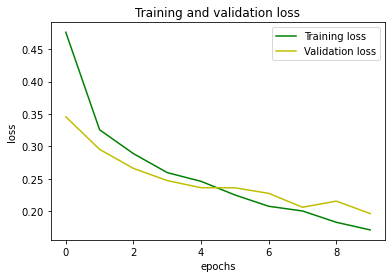

224.16850195105053 82.38051041178593 49.26752506024502 20.939102141291446 0.4334441545585006 0.2817181240418167
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.5337 - accuracy: 0.7218 - val_loss: 0.3622 - val_accuracy: 0.8573
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3446 - accuracy: 0.8614 - val_loss: 0.3002 - val_accuracy: 0.8867
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2945 - accuracy: 0.8826 - val_loss: 0.2795 - val_accuracy: 0.8890
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2633 - accuracy: 0.8961 - val_loss: 0.2558 - val_accuracy: 0.9083
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2448 - accuracy: 0.9074 - val_loss: 0.2385 - val_accuracy: 0.9139
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2264 - accuracy: 0.9144 - val_loss: 0.2281 - val_accuracy: 0.9173
Epoch 7/10
49/49 [==============================

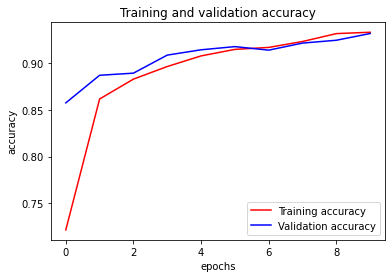

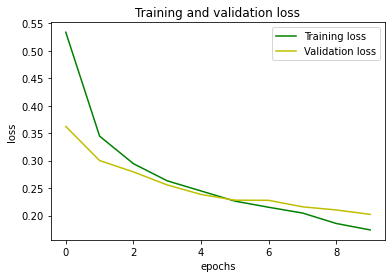

205.38846053105632 71.49608288738 50.80911109268689 22.741908185868436 0.43328034184849873 0.2737445299888855
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4668 - accuracy: 0.7808 - val_loss: 0.3344 - val_accuracy: 0.8709
Epoch 2/10
49/49 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8660 - val_loss: 0.2935 - val_accuracy: 0.8894
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2912 - accuracy: 0.8846 - val_loss: 0.2724 - val_accuracy: 0.9022
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2688 - accuracy: 0.8920 - val_loss: 0.2502 - val_accuracy: 0.9117
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2461 - accuracy: 0.9024 - val_loss: 0.2406 - val_accuracy: 0.9068
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2241 - accuracy: 0.9144 - val_loss: 0.2328 - val_accuracy: 0.9166
Epoch 7/10
49/49 [==============================] 

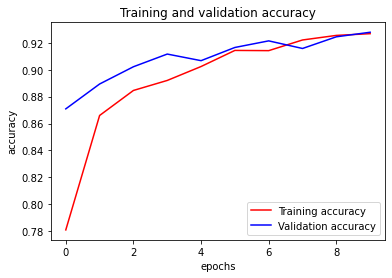

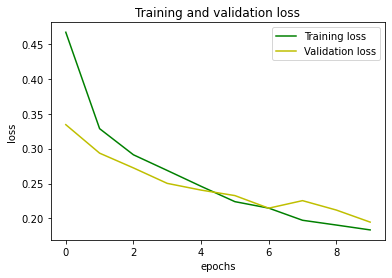

206.32830213404543 84.8135604382578 48.300721939962905 21.360085293467495 0.38556238431827766 0.28635379089909174
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4868 - accuracy: 0.7656 - val_loss: 0.3365 - val_accuracy: 0.8747
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3305 - accuracy: 0.8663 - val_loss: 0.2934 - val_accuracy: 0.8909
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2834 - accuracy: 0.8854 - val_loss: 0.2720 - val_accuracy: 0.8996
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2537 - accuracy: 0.8987 - val_loss: 0.2405 - val_accuracy: 0.9139
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9081 - val_loss: 0.2396 - val_accuracy: 0.9109
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2223 - accuracy: 0.9105 - val_loss: 0.2269 - val_accuracy: 0.9173
Epoch 7/10
49/49 [============================

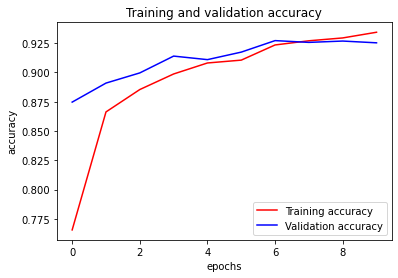

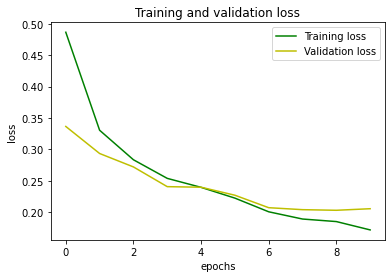

202.29945961815807 74.85284728386581 51.74037718623583 25.52824185059806 0.39215586617532333 0.27983245479007673
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5087 - accuracy: 0.7362 - val_loss: 0.3645 - val_accuracy: 0.8452
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3415 - accuracy: 0.8580 - val_loss: 0.2999 - val_accuracy: 0.8837
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2923 - accuracy: 0.8859 - val_loss: 0.2729 - val_accuracy: 0.8958
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2664 - accuracy: 0.8983 - val_loss: 0.2538 - val_accuracy: 0.9018
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2394 - accuracy: 0.9071 - val_loss: 0.2449 - val_accuracy: 0.9098
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2238 - accuracy: 0.9116 - val_loss: 0.2256 - val_accuracy: 0.9188
Epoch 7/10
49/49 [=============================

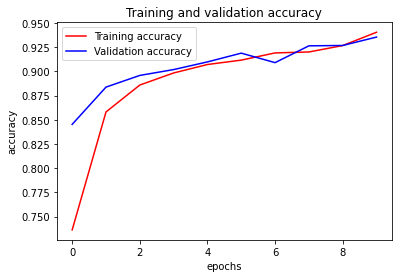

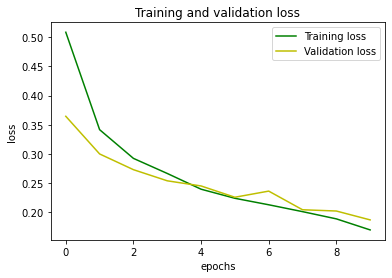

162.61629101542528 76.12623865621396 42.33247311777017 19.579017099199415 0.29718571312930114 0.14630160218816182
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.4760 - accuracy: 0.7782 - val_loss: 0.3392 - val_accuracy: 0.8633
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3263 - accuracy: 0.8674 - val_loss: 0.2988 - val_accuracy: 0.8796
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2801 - accuracy: 0.8859 - val_loss: 0.2852 - val_accuracy: 0.8924
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2581 - accuracy: 0.8987 - val_loss: 0.2537 - val_accuracy: 0.8996
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2419 - accuracy: 0.9040 - val_loss: 0.2481 - val_accuracy: 0.9056
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2207 - accuracy: 0.9149 - val_loss: 0.2269 - val_accuracy: 0.9132
Epoch 7/10
49/49 [============================

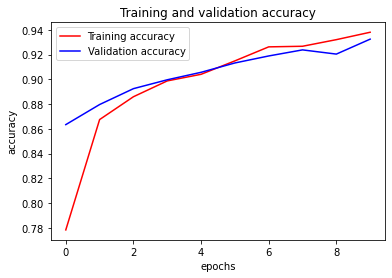

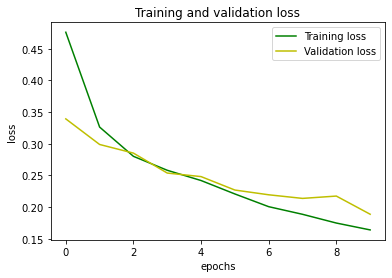

204.07977238332577 77.34210670481447 45.8975818409646 20.249646957700268 0.3786387856044177 0.2849151455185296
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4913 - accuracy: 0.7557 - val_loss: 0.3652 - val_accuracy: 0.8516
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3499 - accuracy: 0.8601 - val_loss: 0.3023 - val_accuracy: 0.8822
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2915 - accuracy: 0.8841 - val_loss: 0.2780 - val_accuracy: 0.8954
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2634 - accuracy: 0.8985 - val_loss: 0.2639 - val_accuracy: 0.9034
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2380 - accuracy: 0.9090 - val_loss: 0.2405 - val_accuracy: 0.9090
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2328 - accuracy: 0.9115 - val_loss: 0.2297 - val_accuracy: 0.9169
Epoch 7/10
49/49 [==============================]

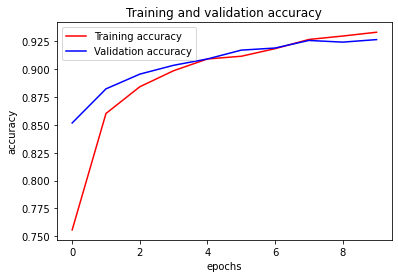

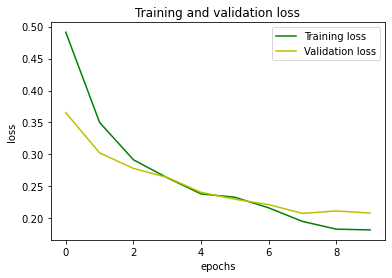

187.71095603483195 70.90880333047683 44.66958114732696 18.9033205327284 0.3412848462859042 0.2136026186909176
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.4922 - accuracy: 0.7467 - val_loss: 0.3658 - val_accuracy: 0.8592
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3316 - accuracy: 0.8600 - val_loss: 0.2991 - val_accuracy: 0.8841
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2874 - accuracy: 0.8822 - val_loss: 0.2693 - val_accuracy: 0.9000
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2627 - accuracy: 0.8956 - val_loss: 0.2533 - val_accuracy: 0.9060
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2398 - accuracy: 0.9055 - val_loss: 0.2416 - val_accuracy: 0.9109
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2260 - accuracy: 0.9113 - val_loss: 0.2281 - val_accuracy: 0.9203
Epoch 7/10
49/49 [==============================] 

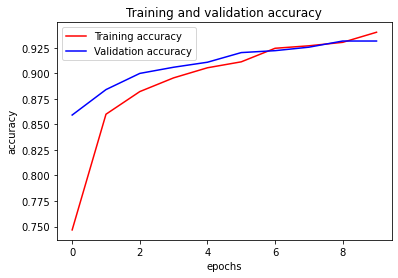

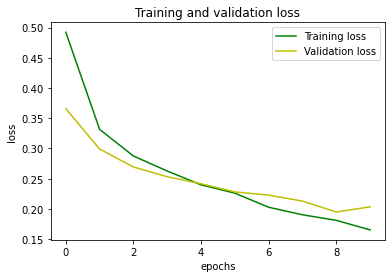

140.97733154909974 64.0 34.98971307858192 12.841710120920963 0.36011138420344024 0.18148996105157367
Epoch 1/10
49/49 [==============================] - 1s 5ms/step - loss: 0.5256 - accuracy: 0.7318 - val_loss: 0.3712 - val_accuracy: 0.8592
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3581 - accuracy: 0.8567 - val_loss: 0.3061 - val_accuracy: 0.8849
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3044 - accuracy: 0.8775 - val_loss: 0.2852 - val_accuracy: 0.8932
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2711 - accuracy: 0.8933 - val_loss: 0.2637 - val_accuracy: 0.9018
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2517 - accuracy: 0.9060 - val_loss: 0.2554 - val_accuracy: 0.9079
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2384 - accuracy: 0.9089 - val_loss: 0.2400 - val_accuracy: 0.9128
Epoch 7/10
49/49 [==============================] - 0s 3ms/

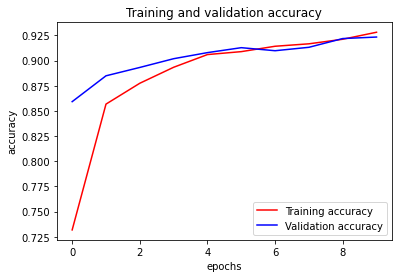

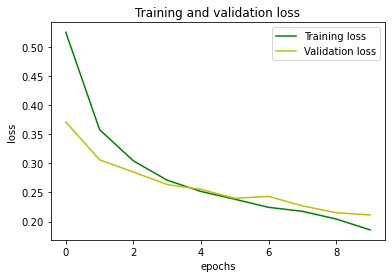

218.8315016448755 99.18999223218505 49.06322328593367 22.69903228218605 0.4677083202425023 0.28196648124685564
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5132 - accuracy: 0.7313 - val_loss: 0.3751 - val_accuracy: 0.8524
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3441 - accuracy: 0.8585 - val_loss: 0.2966 - val_accuracy: 0.8898
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2897 - accuracy: 0.8848 - val_loss: 0.2743 - val_accuracy: 0.8951
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2625 - accuracy: 0.8974 - val_loss: 0.2565 - val_accuracy: 0.9113
Epoch 5/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2466 - accuracy: 0.9069 - val_loss: 0.2515 - val_accuracy: 0.9079
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2256 - accuracy: 0.9142 - val_loss: 0.2383 - val_accuracy: 0.9105
Epoch 7/10
49/49 [==============================]

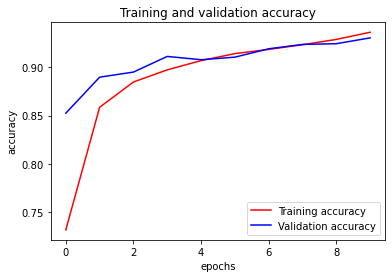

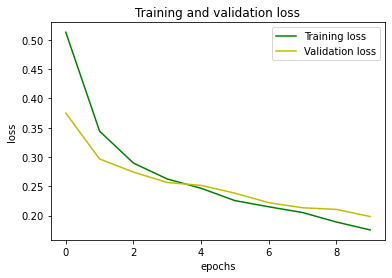

225.6243674493305 83.53670003031881 61.6845756996031 27.861095950266833 0.43756806811945254 0.30787547213809047
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5365 - accuracy: 0.7184 - val_loss: 0.3859 - val_accuracy: 0.8414
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3404 - accuracy: 0.8584 - val_loss: 0.2986 - val_accuracy: 0.8867
Epoch 3/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2855 - accuracy: 0.8835 - val_loss: 0.2934 - val_accuracy: 0.8917
Epoch 4/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2628 - accuracy: 0.8962 - val_loss: 0.2652 - val_accuracy: 0.8981
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2482 - accuracy: 0.9042 - val_loss: 0.2467 - val_accuracy: 0.9075
Epoch 6/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2278 - accuracy: 0.9115 - val_loss: 0.2323 - val_accuracy: 0.9132
Epoch 7/10
49/49 [==============================

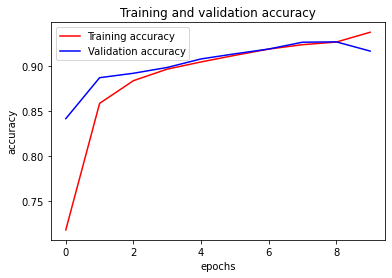

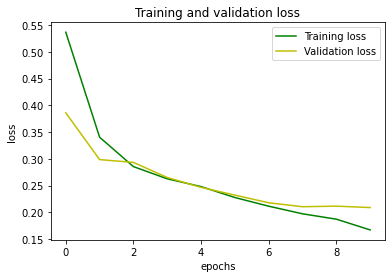

2023/03/16 10:45:40 AM, INFO, mealpy.swarm_based.GWO.GWO_WOA: >Problem: P, Epoch: 1, Current best: 0.9113149847094801, Global best: 0.9113149847094801, Runtime: 85.48389 seconds


Solution: [225.62436745  83.53670003  61.6845757   27.86109595   0.43756807
   0.30787547], Fitness: 0.9113149847094801


In [59]:
from mealpy.swarm_based.GWO import GWO_WOA

def fitness_function(solution):
    return np.sum(solution**2)

problem_dict1 = {
"fit_func": func,
"lb": [128, 64, 32, 8, 0.1, 0.1],
"ub": [256, 128, 64, 32, 0.5, 0.5],
"minmax": "min",
}

epoch = 1
pop_size = 30
model = GWO_WOA(epoch, pop_size)
best_position, best_fitness = model.solve(problem_dict1)
print(f"Solution: {best_position}, Fitness: {best_fitness}")

In [61]:
neuron1, neuron2, neuron3, neuron4, do1, do2 = best_position

225.6243674493305 83.53670003031881 61.6845756996031 27.861095950266833 0.43756806811945254 0.30787547213809047
Epoch 1/10
49/49 [==============================] - 1s 6ms/step - loss: 0.5319 - accuracy: 0.7252 - val_loss: 0.3485 - val_accuracy: 0.8581
Epoch 2/10
49/49 [==============================] - 0s 3ms/step - loss: 0.3466 - accuracy: 0.8551 - val_loss: 0.2968 - val_accuracy: 0.8822
Epoch 3/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2856 - accuracy: 0.8859 - val_loss: 0.2739 - val_accuracy: 0.9060
Epoch 4/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2711 - accuracy: 0.8927 - val_loss: 0.2524 - val_accuracy: 0.9079
Epoch 5/10
49/49 [==============================] - 0s 3ms/step - loss: 0.2417 - accuracy: 0.9076 - val_loss: 0.2475 - val_accuracy: 0.9068
Epoch 6/10
49/49 [==============================] - 0s 4ms/step - loss: 0.2299 - accuracy: 0.9150 - val_loss: 0.2177 - val_accuracy: 0.9241
Epoch 7/10
49/49 [==============================

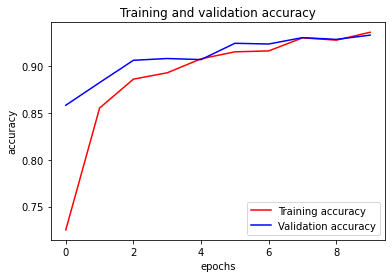

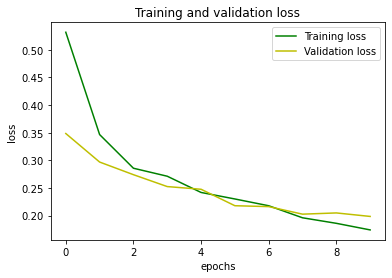

In [64]:
neuron1, neuron2, neuron3, neuron4, do1, do2 = best_position
print(neuron1, neuron2, neuron3, neuron4, do1, do2)
neuron1, neuron2, neuron3, neuron4, do1, do2 = int(neuron1), int(neuron2), int(neuron3), int(neuron4), do1, do2
model = Sequential()

model.add(Dense(units=round(neuron1),input_dim=xtrain.shape[1],activation='relu'))
model.add(Dense(units=round(neuron2), activation='relu')) # adds a dense layer with relu activation function.
model.add(Dropout(do1))
model.add(Dense(units=round(neuron3),activation ="relu")) # adds a dense layer with relu activation function.
#model.add(Dropout(do2))
model.add(Dense(units=round(neuron4),activation ="relu"))
model.add(Dense(units=1, activation='sigmoid')) # output layer with the sigmoid function

# Compiling the model using loss function, optimizer and metrics.
model.compile(loss='binary_crossentropy', optimizer='Adam', metrics=['accuracy'])

# Training our model using the fit() method
history = model.fit(xtrain, ytrain, batch_size=128, epochs=10, validation_split = 0.3)

predicted = model.predict(xtest)

predicted_label = np.where(predicted > 0.5, 1, 0)

accuracy = accuracy_score(predicted_label, ytest)
print('Accuracy : ',accuracy)

model.save("my_model.h5") # saving our model

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.legend()
plt.title('Training and validation accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.savefig('proposed accuracy.png')
plt.show()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'y', label='Validation loss')
plt.legend()
plt.title('Training and validation loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.savefig('proposed loss.png')
plt.show()

In [65]:
predicted = model.predict(xtest) 
predicted_label = np.where(predicted > 0.5, 1, 0)
accuracy = accuracy_score(predicted_label, ytest)
print('Accuracy : ',accuracy)

31/31 [==============================] - 0s 2ms/step
Accuracy :  0.928644240570846
